In [1]:
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import datetime  # Import the datetime module
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import pandas as pd
import plotly.graph_objects as go
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a container to display page content
page_container = widgets.Output()
global GenerationsList, Matched_List

GenerationsList = []
Matched_List = []

# Define functions for each page
def show_home(b):
    from IPython.display import display, HTML, clear_output
    import numpy as np
    import matplotlib.pyplot as plt
    import ipywidgets as widgets
    import random
    import math

    global button_generate
    button_generate = None

    graph_container = widgets.Output()
    graph_container2 = widgets.Output()
    graph_container3 = widgets.Output()

    with page_container:
        clear_output(wait=True)
        home_content = '''
        <div style="font-family: Arial;">
            <h1>Welcome to the FH Screening Strategy Simulator</h1>
        </div>
        '''

        # Section 1
        default_end_year = datetime.datetime.now().year
        default_age_gap = 10
        default_fh_prevalence = 250

        # Creating a new ID for progenitors
        global global_counter
        global_counter = -1

        global Latest_Family_ID
        Latest_Family_ID = 0

        def Generate_newID():
            global Latest_Family_ID
            Latest_Family_ID += 1
            return Latest_Family_ID

        end_value = default_end_year

        # Update years, gap values, and FH prevalence
        def update_all_values(end_year_value, age_gap_value, fh_prevalence_value):
            global end_value, start_year, end_year, age_gap, fh_cmp

            end_year1 = end_year_value
            end_year = end_year_value
            start_year = end_year - 315
            age_gap = [-age_gap_value, age_gap_value]
            fh_cmp = fh_prevalence_value
            
            print(start_year, end_year)
            print(fh_cmp)

        # Ensure that end year is not before start year
        def validate_end_year(change):
            pass

        # Handle the update button click event
        def handle_update(_):
            update_all_values(end_year_input.value, age_gap_input.value, fh_prevalence_input.value)
            plot_values(TP_start_slider.value, TP_end_slider.value)
            render_plot(TPFR_start_slider.value, TPFR_end_slider.value)
            render_plot2(lb_start_slider.value, lb_end_slider.value)

            # Check if sliders are defined and then adjust the slider values
            if 'start_value_slider' in globals() and 'end_value_slider' in globals():
                start_value_slider.value = start_value
                end_value_slider.value = end_value

        # Create the update button and bind the click event to the handler
        update_button = widgets.Button(description="Update")
        update_button.on_click(handle_update)

        # Adjust the width, font, and font size of the labels
        label_width = '150px'
        label_font = 'Arial, sans-serif'
        label_font_size = '16px'
        input_width = '100px'  # Define input_width before using it

        end_year_label = widgets.HTML('End Year:',  # Change label to "Current Year"
                                      layout=widgets.Layout(width=label_width),
                                      style={'font-family': label_font, 'font-size': label_font_size})
        age_gap_label = widgets.HTML('Couple Age Gap Range:',
                                     layout=widgets.Layout(width=label_width),
                                     style={'font-family': label_font, 'font-size': label_font_size})
        fh_prevalence_label = widgets.HTML('FH Prevalence: 1 per',
                                           layout=widgets.Layout(width=label_width),
                                           style={'font-family': label_font, 'font-size': label_font_size})

        # Create the input boxes with a narrower width
        end_year_input = widgets.IntText(value=default_end_year, layout=widgets.Layout(width=input_width))
        age_gap_input = widgets.IntText(value=default_age_gap, layout=widgets.Layout(width=input_width))
        fh_prevalence_input = widgets.IntText(value=default_fh_prevalence, layout=widgets.Layout(width=input_width))

        # Add observers for end year validation
        end_year_input.observe(validate_end_year, 'value')

        # Arrange labels and input boxes horizontally
        end_year_row = widgets.HBox([end_year_label, end_year_input])
        age_gap_row = widgets.HBox([age_gap_label, age_gap_input])
        fh_prevalence_row = widgets.HBox([fh_prevalence_label, fh_prevalence_input])

        # Create a Markdown section title with a dashed line
        section_title11 = HTML('<hr><h2 style="font-size: 24px; font-family: Arial;">Section 1:</h2>')
        section_title12 = HTML('<b2 style="font-size: 20px; font-family: Arial;">General Settings</b2>')

        # Section title and content
        output = widgets.Output()
        with output:
            display(section_title11)
            display(section_title12)
            display(end_year_row, age_gap_row, fh_prevalence_row, update_button)

        out = widgets.interactive_output(update_all_values,
                                         {'end_year_value': end_year_input,
                                          'age_gap_value': age_gap_input,
                                          'fh_prevalence_value': fh_prevalence_input})

        # Display the content within the page_container
        display(HTML(home_content))
        display(output)
        display(out)
#         display(HTML('<hr>'))
        print(start_year, end_year)
        
        
        # Section 2
          
        import numpy as np
        import matplotlib.pyplot as plt
        from ipywidgets import interact, interactive, FloatSlider, FloatText, Button, VBox, HBox, Label, HTML, Layout

        # @title Generation Zero - Population Structure
        ## # Input data

        y = [31543, 31543, 31543, 31543, 31092, 31092, 31092, 31092, 31092,
               31092, 31092, 31092, 26627, 26627, 26627, 26627, 26627, 24791,
               24791, 24791, 24184, 24184, 24184, 24184, 24184, 20300, 20300,
               20300, 20300, 20300, 16824, 16824, 16824, 16824, 16824, 16824,
               16824, 16824, 16824, 16824, 16824, 16824, 16824, 16824, 16824,
               16176, 16176, 16176, 16176, 16176, 16176, 16176, 16176, 16176,
               16176, 16176, 16176, 16176, 16176, 16176, 14900, 14900, 14900,
               14900, 14900, 11856, 11856, 11856, 11856, 11856,  3445,  3445,
                3445,  3445,  3445,  3445,  3445,  3445,  3445,  3445,  3445,
                3445,  3445,  3445,  3445,  3445,  3445,  3445,  3445,  3445,
                3445,  3445,  3445,  3445,  3445,  3445,  3445,  3445,  3445,
                3445,  3445]

        # Function definitions

        def heaviside(x, a, c, k):
            return np.maximum(a + np.exp((-k*x) + (k*c)), 0)

        def plot_heaviside(a, c, k):
            x = np.arange(len(y))
            y_fit = heaviside(x, a, c, k)

            y_scaled = np.array(y)*0.001
            y_fit_scaled = y_fit*0.001

            fig, ax = plt.subplots()
            #ax.bar(x, y_scaled, width=0.8, color='black', edgecolor='black', label='Example data')
            ax.plot(x, y_fit_scaled, color='red')
            ax.set_xlabel('Age (years)', fontsize=12)
            ax.set_ylabel('Population size', fontsize=12)
            #ax.legend()
            plt.show()

            global f_ages
            f_ages = y_fit_scaled.astype(int)

        # Sliders and input fields
        a_slider = FloatSlider(min=-10000, max=5500, step=1500, value=1274.4646464646464, description='a')
        c_slider = FloatSlider(min=485, max=530, step=5, value=515.1515151515152, description='c')
        k_slider = FloatSlider(min=0.016, max=0.0210, step=0.00030, value=0.020202020202020204, description='k')

        def update_slider_params(change):
            """Update slider parameters based on input fields."""
            a_slider.min, a_slider.max, a_slider.step = a_min.value, a_max.value, a_step.value
            c_slider.min, c_slider.max, c_slider.step = c_min.value, c_max.value, c_step.value
            k_slider.min, k_slider.max, k_slider.step = k_min.value, k_max.value, k_step.value

        # Adjust the width, font, and font size of the labels
        label_width = '150px'
        label_font = 'Arial, sans-serif'
        label_font_size = '16px'


        # Input fields to manually set min, max, and step of sliders
        a_min = FloatText(value=-10000, description='a min:', layout=Layout(width='170px'))
        a_max = FloatText(value=5500, description='a max:', layout=Layout(width='170px'))
        a_step = FloatText(value=1500, description='a step:', layout=Layout(width='170px'))
        c_min = FloatText(value=485, description='c min:', layout=Layout(width='170px'))
        c_max = FloatText(value=530, description='c max:', layout=Layout(width='170px'))
        c_step = FloatText(value=5, description='c step:', layout=Layout(width='170px'))
        k_min = FloatText(value=0.016, description='k min:', layout=Layout(width='170px'))
        k_max = FloatText(value=0.0210, description='k max:', layout=Layout(width='170px'))
        k_step = FloatText(value=0.00030, description='k step:', layout=Layout(width='170px'))

        # Set up a button to update the slider parameters
        update_button = Button(description="Update Sliders")
        update_button.on_click(update_slider_params)

        # Displaying widgets
        input_fields = VBox([
            HBox([a_min, a_max, a_step]),
            HBox([c_min, c_max, c_step]),
            HBox([k_min, k_max, k_step]),
            update_button
        ])

        # Section 2 titles
        section_title21 = HTML('<hr><h2 style="font-size: 24px; font-family: Arial;">Section 2:</h2>')
        section_title22 = HTML('<b2 style="font-size: 20px; font-family: Arial;">Generation Zero Population Structure</b2>')

#        section_title3 = HTML('<hr><h2 style="font-size: 22px; font-family: Arial, sans-serif;">Section 2: Generation Zero Population Structure</h2>') 
#         section2_description = HTML('''
# <b2 style="font-size: 16px; font-family: Arial, sans-serif;">&nbsp;&nbsp;&nbsp;<b>2.2</b> You can adjust the bound for the 'a', 'c', and 'k sliders, inputting your desired 'min', 'max', and 'step' in the corresponding rows.</b2><br>
# <b2 style="ffiont-size: 16px; font-family: Arial, sans-serif;">&nbsp;&nbsp;&nbsp;<b>2.3</b> Once satisfied, press the 'Update Sliders' button </b2><br>
# ''')

#         section2_description2 = HTML('''
# <b2 style="font-size: 16px; font-family: Arial, sans-serif;"><b>2.1.1</b> This section defines the initial population's age distribution, starting the family tree generation process.</b2><br>
# <b2 style="font-size: 16px; font-family: Arial, sans-serif;"><b>2.1.2</b>  Adjust the sliders to change the population structure.  These values are updated automatically</b2><br>
# ''')


        s2 = interactive(plot_heaviside, a=a_slider, c=c_slider, k=k_slider, )


       # Create an Output widget to display the section title and content
        output = widgets.Output()
        with output:
            display(section_title21)
            display(section_title22)
            #display(section2_description2)
            display(input_fields)
            #display(section2_description)
            display(s2)
            
            
            
            #display(HTML('<hr>'))  # Add another line after the widgets

        display(output)

        

        
        # Section 3
        

        # Import necessary libraries
        import numpy as np
        import matplotlib.pyplot as plt
        import ipywidgets as widgets
        from IPython.display import HTML, clear_output, display
        
        
        # 19/12/2023 @ 21:51 to replace --> default_min_value, _max, _step
        # Slider settings widgets
        TP_slider_settings = {
            'min': widgets.FloatText(value=100000, description='Min Value:'),
            'max': widgets.FloatText(value=3000000, description='Max Value'),
            'step': widgets.FloatText(value=10000, description='Step:')
        }
        
        # 19/12/2023 @ 21:51 to replace --> Original default values
        # Slider widgets with default settings
        TP_start_slider = widgets.FloatSlider(
            value = 1236050,
            description = 'Start year:',
            orientation = 'horizontal',
            min=TP_slider_settings['min'].value,
            max=TP_slider_settings['max'].value
        )
        
        TP_end_slider = widgets.FloatSlider(
            value = 1903100,
            description = 'End year:',
            orientation = 'horizontal',
            min=TP_slider_settings['min'].value,
            max=TP_slider_settings['max'].value
        )
        
        
        graph_container = widgets.Output()
        
        # 19/12/2023 @ 21:51
        # Functions to refresh sliders with new settings
        def update_sliders(b):
            TP_start_slider.min = TP_slider_settings['min'].value
            TP_start_slider.max = TP_slider_settings['max'].value
            TP_start_slider.step = TP_slider_settings['step'].value
            
            TP_end_slider.min = TP_slider_settings['min'].value
            TP_end_slider.max = TP_slider_settings['max'].value
            TP_end_slider.step = TP_slider_settings['step'].value
            
        # Update Sliders button
        TP_update_sliders_button = widgets.Button(description="Update Sliders")
        TP_update_sliders_button.on_click(update_sliders)
        
        
#         outout = []
        # Function to update the plot based on start_value and end_value
        def plot_values(start_value, end_value):
            with graph_container:
                clear_output(wait=True)
                
                global TP_output
                x = np.arange(start_year, end_year + 1, 1)
                y = np.linspace(start_value, end_value, len(x))
                TP_output = [x, y]
                
                plt.figure(figsize=(7.7, 5))
                plt.plot(x, y, color='gold', linewidth=5)
                plt.xlabel('Year', fontsize=14)
                plt.ylabel('Total population', fontsize=14)
                plt.xlim(start_year, end_year)
                plt.ylim(0, max(start_value, end_value) + 100000)
                plt.show()
        

        section3_TP_output = widgets.interactive_output(
            plot_values,
            {
                'start_value': TP_start_slider,
                'end_value': TP_end_slider,
            }
        )

        # Display section titles
        section_title31 = HTML('<hr><h2 style="font-size: 24px; font-family: Arial;">Section 3:</h2>')
        section_title32 = HTML('<b2 style="font-size: 20px; font-family: Arial;">Total Population</b2>')

        # Display section 3
        display(section_title31)
        display(section_title32)
        display(TP_slider_settings['min'], TP_slider_settings['max'], TP_slider_settings['step'])
        display(TP_update_sliders_button,  TP_start_slider, TP_end_slider,section3_TP_output, graph_container)




        #print(outout)
        # @title
        
        x_values, y_values = TP_output[0], TP_output[1]


        Interpolated_Population = []

        for i in range(0, len(x_values)):
            Interpolated_Population.append([x_values[i], int(y_values[i])])
        #print(Interpolated_Population)        
        
        # Section 4
        
        
        
        import numpy as np
        import matplotlib.pyplot as plt
        import ipywidgets as widgets
        from scipy.optimize import curve_fit

        # Define the function to be optimized (Gaussian distribution)
        def gaussian(x, A, k, c):
            return A * np.exp(-(x - c)**2 / (2 * k**2))

        # Load the data
        y = [220., 220., 220., 220., 220., 770.4, 770.4, 770.4,
             770.4, 770.4, 1416.4, 1416.4, 1416.4, 1416.4, 1416.4, 1622.8,
             1622.8, 1622.8, 1622.8, 1622.8, 835.2, 835.2, 835.2, 835.2,
             835.2, 189., 189., 189., 189., 189.]

        # Define the independent variable
        x = np.arange(len(y))

        # Fit the curve to the data
        p0 = [max(y), np.mean(y), np.std(y)]
        popt, pcov = curve_fit(gaussian, x, y, p0)

        # Get the optimal parameters
        A_gaussian, k_gaussian, c_gaussian = popt

        # Define the sliders as integers
        A_slider = widgets.IntSlider(min=100, max=int(A_gaussian + 2000), step=200, value=int(A_gaussian), description='A')
        k_slider = widgets.IntSlider(min=1, max=int(max(k_gaussian, 1)), step=1, value=int(max(k_gaussian, 1)), description='k')
        c_slider = widgets.IntSlider(min=6, max=22, step=2, value=int(c_gaussian), description='c')

        # Global variable for Estimated Yearly Distribution
        #Estimated_Yearly_Distribution = []

        # Define the function to update the plot
        def update_plot(A, k, c):
            global Estimated_Yearly_Distribution

            y_updated = gaussian(x, A, k, c)
            plt.plot(x, y_updated, color='lime', linewidth=6, alpha=0.8, label='fitted\ndistribution')

            # Set the tick positions and labels
            tick_positions = [0, 5, 10, 15, 20, 25, 29]
            tick_labels = ['<20', '20', '25', '30', '35', '40', '>40']
            plt.xticks(tick_positions, tick_labels)
            plt.xlim(0, 29)
            plt.xlabel("Age (Years)", fontsize=14)
            plt.ylabel("Births", fontsize=14)
            plt.show()

            Estimated_Yearly_Distribution = [[i + 15, value] for i, value in enumerate(y_updated)]
  
        # Function to update slider parameters based on input fields
        def update_slider_params(change):
            A_slider.min, A_slider.max, A_slider.step = int(A_min.value), int(A_max.value), int(A_step.value)
            k_slider.min, k_slider.max, k_slider.step = int(k_min.value), int(k_max.value), int(k_step.value)
            c_slider.min, c_slider.max, c_slider.step = int(c_min.value), int(c_max.value), int(c_step.value)

        # Input fields to manually set min, max, and step of sliders
        A_min = widgets.IntText(value=100, description='A min:', layout=widgets.Layout(width='150px'))
        A_max = widgets.IntText(value=int(A_gaussian + 2000), description='A max:', layout=widgets.Layout(width='150px'))
        A_step = widgets.IntText(value=200, description='A step:', layout=widgets.Layout(width='150px'))
        k_min = widgets.IntText(value=1, description='k min:', layout=widgets.Layout(width='150px'))
        k_max = widgets.IntText(value=int(max(k_gaussian, 1)), description='K max:', layout=widgets.Layout(width='150px'))
        k_step = widgets.IntText(value=1, description='k step:', layout=widgets.Layout(width='150px'))
        c_min = widgets.IntText(value=6, description='c min:', layout=widgets.Layout(width='150px'))
        c_max = widgets.IntText(value=22, description='C max:', layout=widgets.Layout(width='150px'))
        c_step = widgets.IntText(value=2, description='c step:', layout=widgets.Layout(width='150px'))

        # Set up a button to update the slider parameters
        update_button = widgets.Button(description="Update Sliders")
        update_button.on_click(update_slider_params)

        # Displaying widgets for slider adjustments
        input_fields = widgets.VBox([
            widgets.HBox([A_min, A_max, A_step]),
            widgets.HBox([k_min, k_max, k_step]),
            widgets.HBox([c_min, c_max, c_step]),
            update_button
        ])

        # Create the widget and display it
        widget = widgets.interactive(update_plot, A=A_slider, k=k_slider, c=c_slider)

        # Create Markdown section titles with a dashed line
        section_title = widgets.HTML('<hr><h2 style="font-size: 24px; font-family: Arial; ">Section 4:</h2>')
        sub_title = widgets.HTML('<b2 style="font-size: 20px; font-family: Arial; ">Age-matched Birth Proportions</b2>')
            

        # Display widgets
        section4 = widgets.VBox([
            section_title,
            sub_title,
            input_fields,
            widget
        ])

        display(section4)

        
        
        
   

        
        # Section 5
        
        def normalise(numbers):
            """
            Normalises a list of numbers by dividing each number by the sum of the numbers.
            """
            total = sum(numbers)
            normalised_numbers = [num/total for num in numbers]
            return normalised_numbers

        y = np.array([938, 57, 30, 22, 19, 14, 17, 13, 10, 9, 6, 9, 9, 8, 12, 11, 16, 14, 17, 16, 16, 17, 18, 20, 20, 22, 17, 15, 21, 20, 35, 20, 25, 33, 24, 36, 28, 30, 37, 42, 43, 44, 62, 77, 85, 81, 78, 67, 90, 93, 126, 117, 143, 142, 157, 174, 177, 189, 183, 214, 227, 200, 233, 247, 262, 332, 300, 333, 340, 366, 425, 341, 440, 480, 487, 518, 557, 469, 497, 460, 550, 377, 409, 360, 416, 335, 307, 216, 196, 160, 132, 84, 76, 62, 34, 31, 17, 15, 17, 6, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])
        y1 = [  2,   2,   3,   1,   2,   3,   0,   3,   1,   1,   1,   2,   2,
                 3,   4,   2,  14,   9,  18,   6,  16,  17,  12,  15,  13,  14,
                18,  16,  20,  11,  23,  26,  20,  21,  31,  27,  29,  33,  29,
                33,  31,  29,  35,  35,  45,  52,  44,  64,  71,  85,  76,  90,
                79, 106, 127, 127, 147, 160, 158, 158, 174, 204, 194, 212, 185,
               217, 251, 250, 255, 300, 339, 365, 401, 400, 402, 455, 509, 467,
               494, 500, 540, 569, 650, 626, 629, 618, 652, 592, 588, 530, 523,
               445, 400, 343, 281, 232, 157, 138,  74,  48,  38,  18,  16,   9,
                 4,   4,   1,   0,   0,   0,   0,   0,   0,   0, 0, 0]
        y_norm = normalise(y)
        y1_norm = normalise(y1)
        
        
        import numpy as np
        import matplotlib.pyplot as plt
        import ipywidgets as widgets
        from IPython.display import display

        # Define the function to be optimized
        def f(A, k, c, b, d):
            y_gaussian = A*np.exp(-k*(x-c)**2)
            y_exponential = np.exp(-b*(x-d))
            y_pred = y_gaussian + y_exponential
            mse = np.mean((y-y_pred)**2)
            #print("y_gaussian = {}\ny_expoential = {}\ny_pred = {}".format(y_guassian, y_exponential, y_pred))
            return mse

        # Define the independent variable
        x = np.arange(len(y))

        # Define the bounds for each parameter
        varbound = np.array([[0, 1000], [0, 0.02], [0, 150], [0, 2], [0, 10]])

        t = [4.73635514e+02, 3.97005304e-03, 7.41218030e+01, 9.99987447e-01, 6.73027632e+00]

        # Define the sliders for each parameter
        # previous value=t[0] [1],[2] etc
        slider_A = widgets.FloatSlider(min=100, max=varbound[0][1], step=100, value=600, description='A')
        slider_k = widgets.FloatSlider(min=0.002, max=0.010, step=0.001, value=0.004, description='k')
        slider_c = widgets.FloatSlider(min=30, max=100, step=10, value=80, description='c')
        slider_b = widgets.FloatSlider(min=0.2, max=1, step=0.1, value=0.4, description='b')
        slider_d = widgets.FloatSlider(min=varbound[4][0], max=varbound[4][1], step=1, value=t[4], description='d')

        # Define the function to update the plot
        def update_plot(slider_A, slider_k, slider_c, slider_b, slider_d):

            global death_distribution

            A = slider_A
            k = slider_k
            c = slider_c
            b = slider_b
            d = slider_d

            y_gaussian = A*np.exp(-k*(x-c)**2)
            y_exponential = np.exp(-b*(x-d))
            y_pred = y_gaussian + y_exponential

            y_pred_norm = normalise(y_pred)

            mse = f(A, k, c, b, d)

            plt.clf()
            #plt.plot(x, y_norm, 'bo', alpha=0.5, label='Example Data (1955)')
            #plt.plot(x, y1_norm, 'go', alpha=0.5, label='Example Data (2021)')
            plt.plot(x, y_pred_norm, 'r-')
        #     plt.title(f'MSE = {mse:.2f}')
            #plt.title(f'Life Expectancy')
            plt.xlabel('Age at death (years)', fontsize=12)
            plt.ylabel('Deaths', fontsize=12)
            #plt.legend()
            plt.show()

            # Return the fitted curve
            death_distribution = y_pred

            return death_distribution

        # Create the interactive plot
        widget = widgets.interactive(update_plot, slider_A=slider_A, slider_k=slider_k, slider_c=slider_c, slider_b=slider_b, slider_d=slider_d)

        def get_death_distribution():
            global death_distribution

            A = slider_A.value
            k = slider_k.value
            c = slider_c.value
            b = slider_b.value
            d = slider_d.value

            y_gaussian = A*np.exp(-k*(x-c)**2)
            y_exponential = np.exp(-b*(x-d))
            y_pred = y_gaussian + y_exponential

            death_distribution = y_pred

            return death_distribution

        # Create Markdown section titles with Arial font and a dashed line
        section_title = widgets.HTML('<hr><h2 style="font-size: 24px; font-family: Arial, sans-serif;">Section 5:</h2>')
        sub_title = widgets.HTML('<b2 style="font-size: 20px; font-family: Arial, sans-serif;">Life Expectancy</b2>')

        # Display widgets for Section 5
        display(section_title)
        display(sub_title)
        display(widget)

        # Get the fitted curve for Section 5
        y_pred = widget.result
        death_distribution = normalise(y_pred)


        

        # Import necessary libraries and data
        import matplotlib.pyplot as plt
        import ipywidgets as widgets
        from IPython.display import display

        # Data
        labels = ['Zero', 'One', 'Two', 'Three+']
        colors = ['magenta', 'orange', 'cyan', 'lime']

        # Create initial data
        initial_sizes = [40.8, 34.7, 16.3, 8.2]

        # Default values for the integrated widgets
        default_reference_year = 2012
        default_reference_female_population = 25269
        default_total_female_population_reference = 374500

        widget_width = '200px'
        label_padding = '10px'
        font_size = '16px'

        # Create pie chart
        def update_chart(Zero1, One, Two, Three, ref_year, fem_population, total_fem_population_reference):
            global my_list_pie, reference_year, female_population, total_female_population_reference

            reference_year = ref_year
            female_population = fem_population
            total_female_population_reference = total_fem_population_reference

            # Check if any input value is 0 or 100
            if Zero1 == 0 or Zero1 == 100 or One == 0 or One == 100 or Two == 0 or Two == 100 or Three == 0 or Three == 100:
                print('Input values must be between 1 and 99')
                return

            total = Zero1 + One + Two + Three
            sizes = [Zero1 / total * 100, One / total * 100, Two / total * 100, Three / total * 100]

            plt.clf()  # Clear the previous plot

            plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
            plt.show()

            my_list_pie = sizes

            print(my_list_pie)
            global Previous_Births_2012
            Previous_Births_2012 = [['0 births'], ['1 birth'], ['2 births'], ['3 births']]
            for i in range(len(my_list_pie)):
                Previous_Births_2012[i].append(female_population * (my_list_pie[i] / 100))

        # Create sliders
        Zero1 = widgets.FloatSlider(min=0.1, max=99.9, step=0.1, value=initial_sizes[0], description='0 births', readout_format='.1f')
        One = widgets.FloatSlider(min=0.1, max=99.9, step=0.1, value=initial_sizes[1], description='1 birth', readout_format='.1f')
        Two = widgets.FloatSlider(min=0.1, max=99.9, step=0.1, value=initial_sizes[2], description='2 births', readout_format='.1f')
        Three = widgets.FloatSlider(min=0.1, max=99.9, step=0.1, value=initial_sizes[3], description='3+ births', readout_format='.1f')

        # Create input widgets with HTML descriptions
        reference_year_label = widgets.HTML(value='<span style="padding:{}">Reference Year:</span>'.format(label_padding, font_size))
        female_population_label = widgets.HTML(value='<span style="padding:{}">Live Births at reference year:</span>'.format(label_padding, font_size))
        total_female_population_reference_label = widgets.HTML(value='<span style="padding:{}">Total Female Population at Reference Year:</span>'.format(label_padding, font_size))

        # Define the padding and widget width
        label_padding = '5px 5px 5px 0'
        widget_width = '100px'

        reference_year_input = widgets.IntText(value=2012, layout=widgets.Layout(width=widget_width, margin='0 0 0 10px'))
        female_population_input = widgets.IntText(value=25269, layout=widgets.Layout(width=widget_width, margin='0 0 0 10px'))
        total_female_population_reference_input = widgets.IntText(value=374500, layout=widgets.Layout(width=widget_width, margin='0 0 0 10px'))

        # Arrange labels and input boxes in a grid
        input_grid = widgets.GridBox(children=[
            reference_year_label, reference_year_input,
            female_population_label, female_population_input,
            total_female_population_reference_label, total_female_population_reference_input
        ],
        layout=widgets.Layout(
            grid_template_columns='300px 150px',
            grid_gap='1px',
            align_items='center'
        ))

        # Display the grid
        # display(input_grid)

        # Create a gap for vertical space after the description
        vertical_space_after_description = widgets.HTML(value='<div style="height: 0px;"></div>')

        # Markdown section titles
        section_6_line = widgets.HTML('<hr>')
        section_6_title = widgets.HTML('<h2 style="font-size: 24px; font-family: Arial;">Section 6:</h2>')
        reference_distribution_label = widgets.HTML('<h3 style="font-size: 20px; font-family: Arial; ">Reference Distribution:</h3>')

        # Creating interact UI
        ui = widgets.VBox([
            input_grid,
            vertical_space_after_description,  # Add vertical space after description
            Zero1, One, Two, Three
        ])

        out = widgets.interactive_output(update_chart,
                                         {'Zero1': Zero1,
                                          'One': One,
                                          'Two': Two,
                                          'Three': Three,
                                          'ref_year': reference_year_input,
                                          'fem_population': female_population_input,
                                          'total_fem_population_reference': total_female_population_reference_input})

        # Display the content
        section6 = widgets.VBox([
            section_6_line,  # Horizontal line above the title
            section_6_title,
            reference_distribution_label,  # Label for Reference Distribution
            ui,
            out
        ])
        display(section6)


    
    
    
        
        # Section 7

        # @title Section 7: Total Period Fertility Rate 
        import numpy as np
        import matplotlib.pyplot as plt
        import ipywidgets as widgets
        from IPython.display import HTML, clear_output, display

        

        # Slider settings widgets
        TPFR_slider_settings = {
            'min': widgets.FloatText(value=1, description='Min Value:'),
            'max': widgets.FloatText(value=3, description='Max Value:'),
            'step': widgets.FloatText(value=0.01, description='Step:')
        }

        # Create initial slider widgets with default settings
        TPFR_start_slider = widgets.FloatSlider(
            value=2.39,
            description='TPFR Start:',
            orientation='horizontal',
            min=TPFR_slider_settings['min'].value,
            max=TPFR_slider_settings['max'].value
        )
        TPFR_end_slider = widgets.FloatSlider(
            value=2.15,
            description='TPFR End:',
            orientation='horizontal',
            min=TPFR_slider_settings['min'].value,
            max=TPFR_slider_settings['max'].value
        )

        # Global variable
        #TPFR_Estimated = []

        # Create an Output widget for the plot
        graph_container2 = widgets.Output()

        # Function to refresh sliders with new settings
        def update_sliders(b):
            TPFR_start_slider.min = TPFR_slider_settings['min'].value
            TPFR_start_slider.max = TPFR_slider_settings['max'].value
            TPFR_start_slider.step = TPFR_slider_settings['step'].value

            TPFR_end_slider.min = TPFR_slider_settings['min'].value
            TPFR_end_slider.max = TPFR_slider_settings['max'].value
            TPFR_end_slider.step = TPFR_slider_settings['step'].value

        # Update Sliders button
        update_sliders_button = widgets.Button(description="Update Sliders")
        update_sliders_button.on_click(update_sliders)

        # Function to update the plot when sliders change
        def render_plot(TPFR_start, TPFR_end):  # Include start_year and end_year here
            with graph_container2:
                clear_output(wait=True)

                global TPFR_Estimated

                years = np.arange(start_year, end_year + 1)  # Use updated start_year and end_year here
                tpfr_values = np.linspace(TPFR_start, TPFR_end, len(years))

                TPFR_Estimated = [[year, tpfr] for year, tpfr in zip(years, tpfr_values)]
                plt.figure(figsize=(7.7, 5))
                plt.plot(years, tpfr_values, color='red')
                plt.xlim(start_year, end_year + 25)  # Set the x-axis limits using updated start_year and end_year
                plt.xticks(np.arange(start_year, end_year + 25, 25))
                plt.ylim(min(0, 3.5), max(0, 3.5) + 0.1)  # Adjust y-axis limits based on TPFR values
                plt.xlabel("Year", fontsize=12)
                plt.ylabel("Total period fertility rate", fontsize=12)
                plt.show()

        # Create a function to update the plot and display it
        def update_and_display_plot(TPFR_start, TPFR_end):
            render_plot(TPFR_start, TPFR_end)
        



        
        update_and_display_plot(TPFR_start_slider.value, TPFR_end_slider.value)

        # Create interactive output for the plot
        section7_TPFR_output = widgets.interactive_output(
            update_and_display_plot,
            {
                'TPFR_start': TPFR_start_slider,
                'TPFR_end': TPFR_end_slider,
            }
        )

        
        
    
        # Create Markdown section titles with Arial font and a dashed line
        section_title7 = widgets.HTML('<hr><h2 style="font-size: 24px; font-family: Arial, sans-serif;">Section 7:</h2>')
        sub_title7 = widgets.HTML('<b2 style="font-size: 20px; font-family: Arial, sans-serif;">Total Period Fertility Rate</b2>')
        
        
        display(section_title7)
        display(sub_title7)
        # Display the interactive widgets
        display(TPFR_slider_settings['min'], TPFR_slider_settings['max'], TPFR_slider_settings['step'])
        display(update_sliders_button, TPFR_start_slider, TPFR_end_slider)
        display(graph_container2)  # Display the plot container
        

        
        
        

        
        
        
        
        
        
        # Section 8
        
        
        
        
        
        
        
        
        import numpy as np
        import matplotlib.pyplot as plt
        import ipywidgets as widgets
        from IPython.display import display as ipy_display


        # @title Live Births

        # Slider settings widgets
        lb_slider_settings = {
            'min': widgets.FloatText(value=0, description='Min Value:'),
            'max': widgets.FloatText(value=40000, description='Max Value:'),
            'step': widgets.FloatText(value=5000, description='Step:')
        }

        # Create initial slider widgets with default values AND the settings from lb_slider_settings
        lb_start_slider = widgets.FloatSlider(
            value=31188,
            min=lb_slider_settings['min'].value,
            max=lb_slider_settings['max'].value,
            step=lb_slider_settings['step'].value,
            description='Births Start:',
            orientation='horizontal'
        )
        lb_end_slider = widgets.FloatSlider(
            value=22447,
            min=lb_slider_settings['min'].value,
            max=lb_slider_settings['max'].value,
            step=lb_slider_settings['step'].value,
            description='Births End:',
            orientation='horizontal'
        )

        # Global variable


        # Update Sliders button
        update_sliders_button = widgets.Button(description="Update Sliders")

        # Function to refresh sliders with new settings
        def update_sliders(b):
            lb_start_slider.min = lb_slider_settings['min'].value
            lb_start_slider.max = lb_slider_settings['max'].value
            lb_start_slider.step = lb_slider_settings['step'].value

            lb_end_slider.min = lb_slider_settings['min'].value
            lb_end_slider.max = lb_slider_settings['max'].value
            lb_end_slider.step = lb_slider_settings['step'].value

        update_sliders_button.on_click(update_sliders)



        graph_container3 = widgets.Output()
        # Modify this function to update the plot based on the slider values
        def render_plot2(lb_start, lb_end):
            with graph_container3:

                clear_output(wait=True)
                global Live_Births_a

                years = np.arange(start_year, end_year + 1)
                lb_values = np.linspace(lb_start, lb_end, len(years))

                Live_Births_a = [[year, lb] for year, lb in zip(years, lb_values)]
                plt.figure(figsize=(7.5,5))
                plt.clf()  # Clear the plot
                plt.plot(years, lb_values, color='red')
                plt.xlim(start_year, end_year + 25)  # Set the x-axis limits
                plt.xticks(np.arange(start_year, end_year + 25, 25))
                plt.ylim(0, lb_end_slider.max + 10000)  # Adjust y-axis limits based on the lb_end_slider's max value
                plt.xlabel("Years", fontsize=14)
                plt.ylabel("Live Births", fontsize=14)
                plt.show()

        def update_and_display_plot2(lb_start, lb_end):
            render_plot2(lb_start, lb_end)
        update_and_display_plot2(lb_start_slider.value, lb_end_slider.value)



        section8_lb_output = widgets.interactive(
            render_plot2,
            lb_start=lb_start_slider,
            lb_end=lb_end_slider)

        # Create Markdown section titles with Arial font and a dashed line
        section_title8 = widgets.HTML('<hr><h2 style="font-size: 24px; font-family: Arial, sans-serif;">Section 8:</h2>')
        sub_title8 = widgets.HTML('<b2 style="font-size: 20px; font-family: Arial, sans-serif;">Live Births</b2>')


        # Display 
        slider_settings_box = widgets.VBox(list(lb_slider_settings.values()) + [update_sliders_button])

        display(section_title8)
        display(sub_title8)
        display(slider_settings_box)
        display(section8_lb_output)
        display(graph_container3)        
        
        
          
        
        
        
  

        import ipywidgets as widgets
        from IPython.display import display, clear_output, HTML

        # Create input box and button for the simulation
#         text = widgets.IntText(value=45, description='Number of Cycles:')
#         button_generate = widgets.Button(description="Generate", disabled=False)
#         output = widgets.Output()  # Create an output widget for displaying messages

        text = widgets.IntText(value=45, description='Cycles:')
        button_generate = widgets.Button(description="Generate", disabled=False)
        output = widgets.Output()  # Create an output widget for displaying messages

    
        
        simulate_button = widgets.Button(description="Simulate Screening Strategies")
        
        
        def generate_population(button):
            global GenerationsList, Matched_List
            runs = text.value
            
            GenerationsList = []
            Matched_List = []
            
            start_time = time.time()
            
            progress_bar = widgets.IntProgress(
                value=0,
                min=0,
                max=runs - 1, 
                description='Progress',
                bar_style='info', 
                style={'bar_color': 'blue'}
            )
            
            for i in range(runs):
                r_count = i + 1
                time.sleep(0.1)
                c_out = Generate_Population(r_count, runs)
                GenerationsList.extend(c_out[0])
                Matched_List.extend(c_out[1])
                
                progress_bar.value = i
                
                with output:
                    print(f"Finished for cycle: {r_count}")

            display(progress_bar)
            

        
            end_time = time.time()
            elapsed_time = end_time - start_time
            print("Time taken = {}".format(round(elapsed_time,2)))
        
        button_generate.on_click(generate_population)

        # Display the input and button for the simulation
        ui = widgets.VBox([ 
                         
                           text, button_generate,output])
        
        
        
        section_title9 = widgets.HTML('<hr><h2 style="font-size: 24px; font-family: Arial, sans-serif;">Section 9:</h2>')
        sub_title9 = widgets.HTML('<b2 style="font-size: 20px; font-family: Arial, sans-serif;">Screening Strategy Simulator</b2>')
        display(section_title9)
        display(sub_title9)
        display(ui)

        
        
        
        
        
        
        
        
        
        
        
    
        
        # @title Population Generating Function
        from IPython.display import display, Markdown

        from IPython.core.display import HTML
        import ipywidgets as widgets
        from IPython.display import display, Markdown
        from timeit import default_timer as timer


        style = """
        <style>
            .jupyter-widgets .widget-output .output_area .output_subarea {
                font-size: 400px !important;
            }
        </style>
        """

        display(HTML(style))

        output_box = widgets.Output()

        #print(Live_Births_a)
        # Chris
        #print("Reference year = {}".format(reference_year))
        def Generate_Population(r_count, runs):
            
            
            ry = []
            for i in range(0, len(Interpolated_Population)):
                if Interpolated_Population[i][0] == reference_year-44:
                    ry.append(i)
                    print("Reference year found at {}".format(i))
                else:
                    pass
                    #print("Reference year outside bounds")
            ry
            print(ry)
            
            
            ry2 = []

            for i in range(0, len(Live_Births_a)):
                if Live_Births_a[i][0] == reference_year:
                    ry2.append(i)
            ry2

            Zero = (total_female_population_reference/30) - Previous_Births_2012[0][1]
            
            

            #def Generate_Population():

            from timeit import default_timer as timer

            # Mean of the 30 year age-band at 2012 (reference distribution)
            Mean30yrAgeBand2012 = []
            for i in range(ry[0], ry[0]+30):
                Mean30yrAgeBand2012.append(Interpolated_Population[i][1])
            Mean30yrAgeBand2012 = sum(Mean30yrAgeBand2012)/30
     



            # Function to generalise zero births for years 1821 to 2019
            def ZeroBirths(a):

                '''
                INPUT:  a = Year

                OUTPUT: Zero births for cohort n
                '''

                IndexValues = np.arange(0, len(Interpolated_Population))

                #print("Year {}\n".format(a))
                for i in range(0, len(Interpolated_Population)):

                    if a < end_year and a == Interpolated_Population[i][0]:
                        a = i
                        return(Zero*(Interpolated_Population[a][1]/Mean30yrAgeBand2012))
                    
                            

            
            def Birth_Distribution(birth_year):
                '''
                INPUT: Year (1872 to 2003)
                OUTPUT: Birth distribution for cohort born in birth_year
                '''

                out = []
                x = []

                # Within for loop, counter starts at 15
                counter = 14
                counter2 = birth_year + counter

                # Takes in values from 1872 to 2003

                for i in range(0, len(Live_Births_a)):
                    if birth_year+15 == Live_Births_a[i][0]:
                        out.append(["Born in: ", birth_year])
                        out.append(["Zero births", ZeroBirths(birth_year)])

                        # Indexing for Live_Births_1887_2019
                        # Those born in 1872
                        birth_year = i-1

                        for j in range(0, 30):
                            counter+=1
                            counter2+=1
                            birth_year+=1
                            
                            if birth_year >= len(Live_Births_a)-1:
                                
                                break
                                
                            else:

                                
                                out.append([counter, (Estimated_Yearly_Distribution[j][1] *
                                                  Live_Births_a[birth_year][1])/
                                                  Live_Births_a[ry2[0]][1]])

                        return(out)
                    
     

            def Probability_Distribution(Birth_Distribution):
                
                
                f = Birth_Distribution[0][1]
                b = Birth_Distribution
                c = []
                e = []

                for i in range(1, len(b)):
                    c.append(b[i][1])
                e.append([b[0][1]])
                d = sum(c)

                for i in range(0, len(c)):
                    e.append([b[i+1][0], c[i]/d])
                return(e)
            
            

            def ScalePD(pd):
                a = []

                # if start_year + 30 <= end_year:
                #   b = pd[0][0] - start_year + 30
                # else:



                a = []
                start_year1 = start_year
                end_year1 = end_year
                if (start_year1 + 30) <= end_year1:
                    b = pd[0][0] - (start_year1 + 30)
                else:
                    next_available_value = 0
                    while (start_year1 + 30) > end_year1:
                        next_available_value += 1
                        start_year1 += 1
                    b = pd[0][0] - start_year1 + 30


                for i in range(1, len(pd)):

                    a.append(pd[i][1]*TPFR_Estimated[b][1])
                return(a)

            def Populate(ProbabilityBirth_Distribution):

                '''
                INPUT: Probability_Distribution(Birth_Distribution(Year))
                       Where year of birth ranges from 1872 - 2003

                OUTPUT: Probability Distribution
                '''

                a = ScalePD(ProbabilityBirth_Distribution)

                for i in range(1, len(ProbabilityBirth_Distribution)):
                    ProbabilityBirth_Distribution[i][1] = a[i-1]

                counter = ProbabilityBirth_Distribution[0][0] + 14

                babies = []
                counter2 = 0

                for i in range(1, len(ProbabilityBirth_Distribution)):
                    counter+=1
                    if random.uniform(0, 1) <= ProbabilityBirth_Distribution[i][1]:
                        babies.append(["Baby!", counter, i])
                    else:
                        pass

                for j in range(0, len(babies)):
                    counter2+=1
                    babies[j].append(counter2)

                if babies == []:
                    pass
                else:
                    return(babies)

  
            
            
            


            def Generate(x_Gen_Matched_List):


                test = []

                babies = Populate(Probability_Distribution(Birth_Distribution(x_Gen_Matched_List[0][1])))

                if babies is None:
                    pass
                else:
                    for i in range(0, len(babies)):
                        
        
                        ID = Generate_newID()
                        CoupleID = Generate_newID()
                


                        
                        if x_Gen_Matched_List[0][6] == 0 and x_Gen_Matched_List[1][6] == 0:
                            FH = 0
                        elif (x_Gen_Matched_List[0][6] == 1 and x_Gen_Matched_List[1][6] == 0) or (x_Gen_Matched_List[0][6] == 0 and x_Gen_Matched_List[1][6] == 1):
                            x = random.uniform(0,1)
                            if x <=0.5:
                                FH = 1
                            else:
                                FH = 0
                        else:
                            x = random.uniform(0,1)
                            if x <=0.25:
                                FH = 2
                            elif x > 0.25 and x <=0.75:
                                FH = 1
                            else:
                                FH = 0

                        d =  []
                        bd = babies[i][1]


                        # if babies[i][0] == 'Baby!' and babies[i][1] < 1920:
                        #     d =  (np.random.choice(np.arange(1,117), p=death_distribution))+babies[i][1]



                        # #elif babies[i][0] == 'Baby!' and babies[i][1] in range(1920, 1986):
                        # #    d = (np.random.choice(np.arange(1,116), p=death_distribution[bd-1920]))+babies[i][1]

                        # else:
                        d = (np.random.choice(np.arange(1,117), p=death_distribution))+babies[i][1]

                        if babies[i][0] == 'Baby!':
                            test.append([x_Gen_Matched_List[0][0],
                                         babies[i][1],
                                         babies[i][3],
                                         ID,
                                         CoupleID,
                                         x_Gen_Matched_List[0][4],
                                         FH,
                                         d])
                    #print("babies born = {}".format(len(babies)))
                    return(test)

            def RemoveEmptyLists(n_Generation):
                if n_Generation is None:
                    pass

                else:
                    for i in range(0, len(n_Generation)):
                        if n_Generation[i] == [None]:
                            n_Generation[i].remove(None)
                    for i in range(0, len(n_Generation)):
                        for index, item in enumerate(n_Generation):
                            if not item:
                                del n_Generation[index]

            Matched_List = []
            def Parents(person):
                parents = [match for match in Matched_List if any((parent[0] == person[0] ) and parent[4] == person[5] for parent in match)]
                return parents

            Gen_Zero_Matched_List = []
            First_Gen_Matched_List = []
            Second_Gen_Matched_List = []
            Third_Gen_Matched_List = []
            Fourth_Gen_Matched_List = []
            Fifth_Gen_Matched_List = []
            Sixth_Gen_Matched_List = []
            Seventh_Gen_Matched_List = []
            Eighth_Gen_Matched_List = []
            Ninth_Gen_Matched_List = []
            Tenth_Gen_Matched_List = []
            Eleventh_Gen_Matched_List = []
            
            


            def Match(population, x_gen_population_size, matched_list, unmatched_list, x, y):
                '''

                '''
                import time
                
                def identify(person):
                    parents = Parents(person)
                    id_person = [i[0] for i in parents[0] if parents]
                    return id_person
#                identify(GenerationsList[0])
                
                
                # At each generation the new population is shuffled 
                random.shuffle(population)
                #  The population list is then split in half
                for i in range(0, math.floor(len(population)/2)):
                    if population != Gen_Zero_Population:
                    # The person at the top end of the list is compared against the person at the bottom half
                    # The Family IDs (index 0 and index -1) of the potential couple cannot match
                    # If the previous condition is met and their age-difference is within the inputted range
                    # they are matched as couples.
                    
                        a = identify(population[i+1])
                    
                        if ((population[i+1][0] and population[-i][0] not in a)) and (population[i+1][1] - population[-i][1] in range(x,y)):
                            
                    #if ((population[i+1][0] != population[-i][0])) and (population[i+1][1] - population[-i][1] in range(x,y)):
                            matched_list.append([population[i+1], population[-i]])
                        else:
                            
                                #  Otherwise both individuals are added to the unmatched_list to be reshuffled
                            unmatched_list.append(population[i+1])
                            unmatched_list.append(population[-i])
                    else:                        
                        if ((population[i+1][0] != population[-i][0])) and (population[i+1][1] - population[-i][1] in range(x,y)):
                            matched_list.append([population[i+1], population[-i]])
                        else:
                            unmatched_list.append(population[i+1])
                            unmatched_list.append(population[-i]) 
                        

                    tt = round((len(matched_list) / (x_gen_population_size / 2) * 100))
                for i in range(0, len(matched_list)):
                    matched_list[i][1][4] = matched_list[i][0][4]

                random.shuffle(unmatched_list)
                
                

                return(matched_list, unmatched_list)


            def Remove_Impossible(x_generation):
                """
                Prevents couples from generating beyond life length (date of death)
                """
                max_death_date = max([Parents(ind)[0][0][7] for ind in x_generation] + [Parents(ind)[0][1][7] for ind in x_generation], default=0)
                x = [ind for ind in x_generation if ind[1] <= max_death_date]
                x_generation.clear()
                x_generation.extend(x)



            First_Gen = []
            Gen_Zero = []
            Gen_Zero_FH = []

            for i in range(0, 45):
                Gen_Zero.append([])
                Gen_Zero_FH.append([])


            # Parameter 2:
            ## Generation Zero population proportion

            test = []
            test_x = []

            Latest_Family_ID = 0

            f_ages1 = []

            for i in range(0, len(f_ages)):
                f_ages1.append(f_ages[i])

            for i in range(0, 45):
                f_ages1.append(f_ages[i])
            f_ages1 = f_ages1[::-1]

            for i in range(0, 45):
                Birthyear = (start_year + 44) - i
                Population_Size = f_ages1[i]

                test.append(Population_Size)
                test_x.append(i)

                for j in range(0, Population_Size):
                    
                    fh_c = np.random.choice(np.arange(1,251))
                    
                    if fh_c == 1:
                        famID = Generate_newID()
                        personalID = Generate_newID()
                        coupleID = Generate_newID()
                        
                        # Check famID, personalID and coupleIDs are unique
                        #print(famID, personalID, coupleID)
                        Gen_Zero_FH[i].append([famID, Birthyear, 1, personalID, coupleID, j, 1, (np.random.choice(np.arange(1,117), p=death_distribution))+Birthyear])
                    else:
                        
                        famID = Generate_newID()
                        personalID = Generate_newID()
                        coupleID = Generate_newID()
                        # Check famID, personalID and coupleIDs are unique 
                        #print(famID, personalID, coupleID)
                        Gen_Zero[i].append([famID, Birthyear, 1, personalID, coupleID, j, 0, (np.random.choice(np.arange(1,117), p=death_distribution))+Birthyear])

                    #Gen_Zero_FH[i].append([j, Birthyear, 1, j+1, j+2, j, 1, (np.random.choice(np.arange(1,116), p=death_distribution[56]))+Birthyear])

            Gen_Zero_Population = []

            for i in range(0, len(Gen_Zero_FH)):
                for j in range(0, len(Gen_Zero_FH[i])):
                    Gen_Zero_Population.append(Gen_Zero_FH[i][j])

            for i in range(0, len(Gen_Zero)):
                for j in range(0, len(Gen_Zero[i])):
                    Gen_Zero_Population.append(Gen_Zero[i][j])
            Gen_Zero_Population_Size = len(Gen_Zero_Population)

            # Gen_Zero

            


            #len(Gen_Zero_Population)

            start_time = timer()
            Gen_Zero_Matched_List = []
            Gen_Zero_Unmatched_List = []
            Gen_Zero_Matched_List, Gen_Zero_Unmatched_List = Match(Gen_Zero_Population, Gen_Zero_Population_Size,
                                                                   Gen_Zero_Matched_List, Gen_Zero_Unmatched_List, -1, 1)

            def Gen_Zero_Match(population, x_gen_population, matched_list, unmatched_list, x, y):

                x_gen_population_size = len(x_gen_population)
                random.shuffle(population)
                for i in range(0, math.floor(len(population)/2)):
                    if population[i+1][1] - population[-i][1] in range(x,y):
                        matched_list.append([population[i+1], population[-i]])
                    else:
                        unmatched_list.append(population[i+1])
                        unmatched_list.append(population[-i])

                #print("{}% matched".format(round((len(matched_list)/(x_gen_population_size/2)*100),2)))

                for i in range(0, len(matched_list)):
                    matched_list[i][1][4] = matched_list[i][0][4]

                random.shuffle(unmatched_list)

                return(matched_list, unmatched_list)

            print("\n")
            

            Gen_Zero_Unmatched_List_2 = []
            Gen_Zero_Unmatched_List_3 = []
            Gen_Zero_Unmatched_List_4 = []
            Gen_Zero_Unmatched_List_5 = []
            Gen_Zero_Unmatched_List_6 = []

            Gen_Zero_Matched_List_2, Gen_Zero_Unmatched_List_2 = Gen_Zero_Match(Gen_Zero_Unmatched_List,
                                                                                Gen_Zero_Population,
                                                                                Gen_Zero_Matched_List,
                                                                                Gen_Zero_Unmatched_List_2,
                                                                                age_gap[0], age_gap[1])
            Gen_Zero_Matched_List_3, Gen_Zero_Unmatched_List_3 = Gen_Zero_Match(Gen_Zero_Unmatched_List_2,
                                                                                Gen_Zero_Population,
                                                                                Gen_Zero_Matched_List,
                                                                                Gen_Zero_Unmatched_List_3,
                                                                                age_gap[0], age_gap[1])
            Gen_Zero_Matched_List_4, Gen_Zero_Unmatched_List_4 = Gen_Zero_Match(Gen_Zero_Unmatched_List_3,
                                                                                Gen_Zero_Population,
                                                                                Gen_Zero_Matched_List,
                                                                                Gen_Zero_Unmatched_List_4,
                                                                                age_gap[0], age_gap[1])
            Gen_Zero_Matched_List_5, Gen_Zero_Unmatched_List_5 = Gen_Zero_Match(Gen_Zero_Unmatched_List_4,
                                                                                Gen_Zero_Population,
                                                                                Gen_Zero_Matched_List,
                                                                                Gen_Zero_Unmatched_List_5,
                                                                                age_gap[0], age_gap[1])
            Gen_Zero_Matched_List_6, Gen_Zero_Unmatched_List_6 = Gen_Zero_Match(Gen_Zero_Unmatched_List_5,
                                                                                Gen_Zero_Population,
                                                                                Gen_Zero_Matched_List,
                                                                                Gen_Zero_Unmatched_List_6,
                                                                                age_gap[0], age_gap[1])

            for i in range(0, len(Gen_Zero_Matched_List)):
                Matched_List.append(Gen_Zero_Matched_List[i])
                if Gen_Zero_Matched_List[i][1][6] == 1:
                    Gen_Zero_Matched_List[i] = [Gen_Zero_Matched_List[i][1], Gen_Zero_Matched_List[i][0]]


            with output_box:
                output_box.clear_output(wait=True)

                # Creating and displaying content with ipywidgets HTML
                msg1 = HTML('<span style="font-size: 20px;">|⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜|</span>'.format(r_count, runs))
                display(msg1)

                end_time = timer()
                #msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 0 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
                #display(msg2)


            start_time = timer()
            First_Gen = []
            for i in range(0, len(Gen_Zero_Matched_List)):
                #print(Gen_Zero_Matched_List[i], 'y')
                First_Gen.append(Generate(Gen_Zero_Matched_List[i]))
            RemoveEmptyLists(First_Gen)

            test = []
            for i in range(0, len(First_Gen)):
                for j in range(0, len(First_Gen[i])):
                    test.append(First_Gen[i][j])
            First_Gen = test
            del(test)

            print("Generation 1")




            Remove_Impossible(First_Gen)

            First_Gen_Population_Size = len(First_Gen)

            First_Gen_Matched_List = []
            First_Gen_Unmatched_List = []
            First_Gen_Matched_List, First_Gen_Unmatched_List = Match(First_Gen, First_Gen_Population_Size,
                                                                   First_Gen_Matched_List, First_Gen_Unmatched_List, age_gap[0], age_gap[1])
            First_Gen_Unmatched_List_2 = []
            First_Gen_Matched_List_2, First_Gen_Unmatched_List_2 = Match(First_Gen_Unmatched_List, First_Gen_Population_Size,
                                                                       First_Gen_Matched_List, First_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

            First_Gen_Unmatched_List_3 = []
            First_Gen_Matched_List_3, First_Gen_Unmatched_List_3 = Match(First_Gen_Unmatched_List_2, First_Gen_Population_Size,
                                                                       First_Gen_Matched_List_2, First_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

            First_Gen_Unmatched_List_4 = []
            First_Gen_Matched_List_4, First_Gen_Unmatched_List_4 = Match(First_Gen_Unmatched_List_3, First_Gen_Population_Size,
                                                                       First_Gen_Matched_List_3, First_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

            First_Gen_Unmatched_List_5 = []
            First_Gen_Matched_List_5, First_Gen_Unmatched_List_5 = Match(First_Gen_Unmatched_List_4, First_Gen_Population_Size,
                                                                       First_Gen_Matched_List_4, First_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

            First_Gen_Unmatched_List_6 = []
            First_Gen_Matched_List_6, First_Gen_Unmatched_List_6 = Match(First_Gen_Unmatched_List_5, First_Gen_Population_Size,
                                                                       First_Gen_Matched_List_5, First_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

            
            First_Gen = [item for sublist in First_Gen_Matched_List for item in sublist]
            First_Gen.extend(First_Gen_Unmatched_List_6)  
            
            
            
            #print("Cycle {} of {}, Generation 1 of 9 matched".format(r_count, runs))
            print("\n")

            end_time = timer()
            #print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))


            with output_box:
                output_box.clear_output(wait=True)

                # Creating and displaying content with ipywidgets HTML
                msg1 = HTML('<span style="font-size: 20px;">|⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜|</span>'.format(r_count, runs))
                display(msg1)

                end_time = timer()
                #msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 1 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
                #display(msg2)



            et = round( ((end_time-start_time)/60)*12   ,2)


            #print("Estimated time to complete: {} minutes".format(et))

            for i in range(0, len(First_Gen_Matched_List)):
                if First_Gen_Matched_List[i][1][6] == 1:
                    First_Gen_Matched_List[i] = [First_Gen_Matched_List[i][1], First_Gen_Matched_List[i][0]]

            x = []
            for i in range(0, len(Gen_Zero_Matched_List)):
                x.append(Gen_Zero_Matched_List[i][0][1] - Gen_Zero_Matched_List[i][1][1])


            start_time = timer()
            Second_Gen = []
            test = []
            for i in range(0, len(First_Gen_Matched_List)):
                Matched_List.append(First_Gen_Matched_List[i])
                Second_Gen.append(Generate(First_Gen_Matched_List[i]))
            RemoveEmptyLists(Second_Gen)


            test = []
            for i in range(0, len(Second_Gen)):
                for j in range(0, len(Second_Gen[i])):
                    test.append(Second_Gen[i][j])
            Second_Gen = test
            del(test)

            print("Generation 2")

            Remove_Impossible(Second_Gen)

            Second_Gen_Population_Size = len(Second_Gen)

            Second_Gen_Matched_List = []
            Second_Gen_Unmatched_List = []
            Second_Gen_Matched_List, Second_Gen_Unmatched_List = Match(Second_Gen, Second_Gen_Population_Size,
                                                                   Second_Gen_Matched_List, Second_Gen_Unmatched_List, age_gap[0], age_gap[1])

            Second_Gen_Unmatched_List_2 = []
            Second_Gen_Matched_List_2, Second_Gen_Unmatched_List_2 = Match(Second_Gen_Unmatched_List, Second_Gen_Population_Size,
                                                                       Second_Gen_Matched_List, Second_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

            Second_Gen_Unmatched_List_3 = []
            Second_Gen_Matched_List_3, Second_Gen_Unmatched_List_3 = Match(Second_Gen_Unmatched_List_2, Second_Gen_Population_Size,
                                                                       Second_Gen_Matched_List_2, Second_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

            Second_Gen_Unmatched_List_4 = []
            Second_Gen_Matched_List_4, Second_Gen_Unmatched_List_4 = Match(Second_Gen_Unmatched_List_3, Second_Gen_Population_Size,
                                                                       Second_Gen_Matched_List_3, Second_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

            Second_Gen_Unmatched_List_5 = []
            Second_Gen_Matched_List_5, Second_Gen_Unmatched_List_5 = Match(Second_Gen_Unmatched_List_4, Second_Gen_Population_Size,
                                                                       Second_Gen_Matched_List_4, Second_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

            Second_Gen_Unmatched_List_6 = []
            Second_Gen_Matched_List_6, Second_Gen_Unmatched_List_6 = Match(Second_Gen_Unmatched_List_5, Second_Gen_Population_Size,
                                                                       Second_Gen_Matched_List_5, Second_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

            
            Second_Gen = [item for sublist in Second_Gen_Matched_List for item in sublist]
            Second_Gen.extend(Second_Gen_Unmatched_List_6)  
            
            for i in range(0, len(Second_Gen_Matched_List)):
                if Second_Gen_Matched_List[i][1][6] == 1:
                    Second_Gen_Matched_List[i] = [Second_Gen_Matched_List[i][1], Second_Gen_Matched_List[i][0]]

            #print("Cycle {} of {}, Generation 2 matched".format(r_count, runs))
            print("\n")

            end_time = timer()
            print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))

            with output_box:
                output_box.clear_output(wait=True)

                # Creating and displaying content with ipywidgets HTML
                msg1 = HTML('<span style="font-size: 20px;">|⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜|</span>'.format(r_count, runs))
                display(msg1)

                end_time = timer()
                #msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 2 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
                #display(msg2)


            start_time = timer()
            Third_Gen = []
            test = []
            for i in range(0, len(Second_Gen_Matched_List)):
                Matched_List.append(Second_Gen_Matched_List[i])
                if Second_Gen_Matched_List[i][0][1] < (end_year - 15):
                    Third_Gen.append(Generate(Second_Gen_Matched_List[i]))
                else:
                    pass
            RemoveEmptyLists(Third_Gen)


            test = []
            for i in range(0, len(Third_Gen)):
                for j in range(0, len(Third_Gen[i])):
                    test.append(Third_Gen[i][j])
            Third_Gen = test
            del(test)

            print("Generation 3")

            Remove_Impossible(Third_Gen)

            Third_Gen_Population_Size = len(Third_Gen)

            Third_Gen_Matched_List = []
            Third_Gen_Unmatched_List = []
            Third_Gen_Matched_List, Third_Gen_Unmatched_List = Match(Third_Gen, Third_Gen_Population_Size,
                                                                   Third_Gen_Matched_List, Third_Gen_Unmatched_List, age_gap[0], age_gap[1])

            Third_Gen_Unmatched_List_2 = []
            Third_Gen_Matched_List_2, Third_Gen_Unmatched_List_2 = Match(Third_Gen_Unmatched_List, Third_Gen_Population_Size,
                                                                       Third_Gen_Matched_List, Third_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

            Third_Gen_Unmatched_List_3 = []
            Third_Gen_Matched_List_3, Third_Gen_Unmatched_List_3 = Match(Third_Gen_Unmatched_List_2, Third_Gen_Population_Size,
                                                                       Third_Gen_Matched_List_2, Third_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

            Third_Gen_Unmatched_List_4 = []
            Third_Gen_Matched_List_4, Third_Gen_Unmatched_List_4 = Match(Third_Gen_Unmatched_List_3, Third_Gen_Population_Size,
                                                                       Third_Gen_Matched_List_3, Third_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

            Third_Gen_Unmatched_List_5 = []
            Third_Gen_Matched_List_5, Third_Gen_Unmatched_List_5 = Match(Third_Gen_Unmatched_List_4, Third_Gen_Population_Size,
                                                                       Third_Gen_Matched_List_4, Third_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

            Third_Gen_Unmatched_List_6 = []
            Third_Gen_Matched_List_6, Third_Gen_Unmatched_List_6 = Match(Third_Gen_Unmatched_List_5, Third_Gen_Population_Size,
                                                                       Third_Gen_Matched_List_5, Third_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

            
            Third_Gen = [item for sublist in Third_Gen_Matched_List for item in sublist]
            Third_Gen.extend(Third_Gen_Unmatched_List_6)     
            
            
            #print("Cycle {} of {}, Generation 3 matched".format(r_count, runs))
            print("\n")
            end_time = timer()
            print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))


            with output_box:
                output_box.clear_output(wait=True)

                # Creating and displaying content with ipywidgets HTML
                msg1 = HTML('<span style="font-size: 20px;">|⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜|</span>'.format(r_count, runs))
                display(msg1)

                end_time = timer()
                #msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 3 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
                #display(msg2)



            for i in range(0, len(Third_Gen_Matched_List)):
                if Third_Gen_Matched_List[i][1][6] == 1:
                    Third_Gen_Matched_List[i] = [Third_Gen_Matched_List[i][1], Third_Gen_Matched_List[i][0]]
            start_time = timer()
            Fourth_Gen = []
            test = []
            for i in range(0, len(Third_Gen_Matched_List)):
                Matched_List.append(Third_Gen_Matched_List[i])
                if Third_Gen_Matched_List[i][0][1] < (end_year-15):
                    Fourth_Gen.append(Generate(Third_Gen_Matched_List[i]))
                else:
                    pass
            RemoveEmptyLists(Fourth_Gen)

            test = []
            for i in range(0, len(Fourth_Gen)):
                for j in range(0, len(Fourth_Gen[i])):
                    test.append(Fourth_Gen[i][j])
            Fourth_Gen = test
            del(test)

            print("Generation 4")

            Remove_Impossible(Fourth_Gen)

            Fourth_Gen_Population_Size = len(Fourth_Gen)

            Fourth_Gen_Matched_List = []
            Fourth_Gen_Unmatched_List = []
            Fourth_Gen_Matched_List, Fourth_Gen_Unmatched_List = Match(Fourth_Gen, Fourth_Gen_Population_Size,
                                                                   Fourth_Gen_Matched_List, Fourth_Gen_Unmatched_List, age_gap[0], age_gap[1])

            Fourth_Gen_Unmatched_List_2 = []
            Fourth_Gen_Matched_List_2, Fourth_Gen_Unmatched_List_2 = Match(Fourth_Gen_Unmatched_List, Fourth_Gen_Population_Size,
                                                                       Fourth_Gen_Matched_List, Fourth_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

            Fourth_Gen_Unmatched_List_3 = []
            Fourth_Gen_Matched_List_3, Fourth_Gen_Unmatched_List_3 = Match(Fourth_Gen_Unmatched_List_2, Fourth_Gen_Population_Size,
                                                                       Fourth_Gen_Matched_List_2, Fourth_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

            Fourth_Gen_Unmatched_List_4 = []
            Fourth_Gen_Matched_List_4, Fourth_Gen_Unmatched_List_4 = Match(Fourth_Gen_Unmatched_List_3, Fourth_Gen_Population_Size,
                                                                       Fourth_Gen_Matched_List_3, Fourth_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

            Fourth_Gen_Unmatched_List_5 = []
            Fourth_Gen_Matched_List_5, Fourth_Gen_Unmatched_List_5 = Match(Fourth_Gen_Unmatched_List_4, Fourth_Gen_Population_Size,
                                                                       Fourth_Gen_Matched_List_4, Fourth_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

            Fourth_Gen_Unmatched_List_6 = []
            Fourth_Gen_Matched_List_6, Fourth_Gen_Unmatched_List_6 = Match(Fourth_Gen_Unmatched_List_5, Fourth_Gen_Population_Size,
                                                                       Fourth_Gen_Matched_List_5, Fourth_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

            
            Fourth_Gen = [item for sublist in Fourth_Gen_Matched_List for item in sublist]
            Fourth_Gen.extend(Fourth_Gen_Unmatched_List_6)
            
            
            #print("Cycle {} of {}, Generation 4 matched".format(r_count, runs))
            print("\n")
            end_time = timer()
            print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))



            with output_box:
                output_box.clear_output(wait=True)

                # Creating and displaying content with ipywidgets HTML
                msg1 = HTML('<span style="font-size: 20px;">|⬛⬛⬛⬛⬜⬜⬜⬜⬜⬜|</span>'.format(r_count, runs))
                display(msg1)

                end_time = timer()
                #msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 4 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
                #display(msg2) 



            for i in range(0, len(Fourth_Gen_Matched_List)):
                if Fourth_Gen_Matched_List[i][1][6] == 1:
                    Fourth_Gen_Matched_List[i] = [Fourth_Gen_Matched_List[i][1], Fourth_Gen_Matched_List[i][0]]

            start_time = timer()
            Fifth_Gen = []
            test = []
            for i in range(0, len(Fourth_Gen_Matched_List)):
                Matched_List.append(Fourth_Gen_Matched_List[i])
                if Fourth_Gen_Matched_List[i][0][1] < (end_year-15):
                    Fifth_Gen.append(Generate(Fourth_Gen_Matched_List[i]))
                else:
                    pass
            RemoveEmptyLists(Fifth_Gen)

            test = []
            for i in range(0, len(Fifth_Gen)):
                for j in range(0, len(Fifth_Gen[i])):
                    test.append(Fifth_Gen[i][j])
            Fifth_Gen = test
            del(test)

            print("Generation 5")

            Remove_Impossible(Fifth_Gen)

            Fifth_Gen_Population_Size = len(Fifth_Gen)

            Fifth_Gen_Matched_List = []
            Fifth_Gen_Unmatched_List = []
            Fifth_Gen_Matched_List, Fifth_Gen_Unmatched_List = Match(Fifth_Gen, Fifth_Gen_Population_Size,
                                                                   Fifth_Gen_Matched_List, Fifth_Gen_Unmatched_List, age_gap[0], age_gap[1])

            Fifth_Gen_Unmatched_List_2 = []
            Fifth_Gen_Matched_List_2, Fifth_Gen_Unmatched_List_2 = Match(Fifth_Gen_Unmatched_List, Fifth_Gen_Population_Size,
                                                                       Fifth_Gen_Matched_List, Fifth_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

            Fifth_Gen_Unmatched_List_3 = []
            Fifth_Gen_Matched_List_3, Fifth_Gen_Unmatched_List_3 = Match(Fifth_Gen_Unmatched_List_2, Fifth_Gen_Population_Size,
                                                                       Fifth_Gen_Matched_List_2, Fifth_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

            Fifth_Gen_Unmatched_List_4 = []
            Fifth_Gen_Matched_List_4, Fifth_Gen_Unmatched_List_4 = Match(Fifth_Gen_Unmatched_List_3, Fifth_Gen_Population_Size,
                                                                       Fifth_Gen_Matched_List_3, Fifth_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

            Fifth_Gen_Unmatched_List_5 = []
            Fifth_Gen_Matched_List_5, Fifth_Gen_Unmatched_List_5 = Match(Fifth_Gen_Unmatched_List_4, Fifth_Gen_Population_Size,
                                                                       Fifth_Gen_Matched_List_4, Fifth_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

            Fifth_Gen_Unmatched_List_6 = []
            Fifth_Gen_Matched_List_6, Fifth_Gen_Unmatched_List_6 = Match(Fifth_Gen_Unmatched_List_5, Fifth_Gen_Population_Size,
                                                                       Fifth_Gen_Matched_List_5, Fifth_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

            
            Fifth_Gen = [item for sublist in Fifth_Gen_Matched_List for item in sublist]
            Fifth_Gen.extend(Fifth_Gen_Unmatched_List_6)
            
            
            #print("Cycle {} of {}, Generation 5 matched".format(r_count, runs))
            print("\n")
            end_time = timer()
            print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))



            with output_box:
                output_box.clear_output(wait=True)

                # Creating and displaying content with ipywidgets HTML
                msg1 = HTML('<span style="font-size: 20px;">|⬛⬛⬛⬛⬛⬜⬜⬜⬜⬜|</span>'.format(r_count, runs))
                display(msg1)

                end_time = timer()
                #msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 5 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
                #display(msg2)


            for i in range(0, len(Fifth_Gen_Matched_List)):
                if Fifth_Gen_Matched_List[i][1][6] == 1:
                    Fifth_Gen_Matched_List[i] = [Fifth_Gen_Matched_List[i][1], Fifth_Gen_Matched_List[i][0]]
            start_time = timer()
            Sixth_Gen = []
            test = []
            for i in range(0, len(Fifth_Gen_Matched_List)):
                Matched_List.append(Fifth_Gen_Matched_List[i])
                if Fifth_Gen_Matched_List[i][0][1] < (end_year-15):
                    Sixth_Gen.append(Generate(Fifth_Gen_Matched_List[i]))
                else:
                    pass
            RemoveEmptyLists(Sixth_Gen)

            test = []
            for i in range(0, len(Sixth_Gen)):
                for j in range(0, len(Sixth_Gen[i])):
                    test.append(Sixth_Gen[i][j])
            Sixth_Gen = test
            del(test)

            print("Generation 6")

            Remove_Impossible(Sixth_Gen)

            Sixth_Gen_Population_Size = len(Sixth_Gen)

            Sixth_Gen_Matched_List = []
            Sixth_Gen_Unmatched_List = []
            Sixth_Gen_Matched_List, Sixth_Gen_Unmatched_List = Match(Sixth_Gen, Sixth_Gen_Population_Size,
                                                                   Sixth_Gen_Matched_List, Sixth_Gen_Unmatched_List, age_gap[0], age_gap[1])

            Sixth_Gen_Unmatched_List_2 = []
            Sixth_Gen_Matched_List_2, Sixth_Gen_Unmatched_List_2 = Match(Sixth_Gen_Unmatched_List, Sixth_Gen_Population_Size,
                                                                       Sixth_Gen_Matched_List, Sixth_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

            Sixth_Gen_Unmatched_List_3 = []
            Sixth_Gen_Matched_List_3, Sixth_Gen_Unmatched_List_3 = Match(Sixth_Gen_Unmatched_List_2, Sixth_Gen_Population_Size,
                                                                       Sixth_Gen_Matched_List_2, Sixth_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

            Sixth_Gen_Unmatched_List_4 = []
            Sixth_Gen_Matched_List_4, Sixth_Gen_Unmatched_List_4 = Match(Sixth_Gen_Unmatched_List_3, Sixth_Gen_Population_Size,
                                                                       Sixth_Gen_Matched_List_3, Sixth_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

            Sixth_Gen_Unmatched_List_5 = []
            Sixth_Gen_Matched_List_5, Sixth_Gen_Unmatched_List_5 = Match(Sixth_Gen_Unmatched_List_4, Sixth_Gen_Population_Size,
                                                                       Sixth_Gen_Matched_List_4, Sixth_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

            Sixth_Gen_Unmatched_List_6 = []
            Sixth_Gen_Matched_List_6, Sixth_Gen_Unmatched_List_6 = Match(Sixth_Gen_Unmatched_List_5, Sixth_Gen_Population_Size,
                                                                       Sixth_Gen_Matched_List_5, Sixth_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

            
            Sixth_Gen = [item for sublist in Fifth_Gen_Matched_List for item in sublist]
            Sixth_Gen.extend(Sixth_Gen_Unmatched_List_6)
            
            #print("Cycle {} of {}, Generation 6 matched".format(r_count, runs))
            print("\n")
            end_time = timer()
            print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))


            with output_box:
                output_box.clear_output(wait=True)

                # Creating and displaying content with ipywidgets HTML
                msg1 = HTML('<span style="font-size: 20px;">|⬛⬛⬛⬛⬛⬛⬜⬜⬜⬜|</span>'.format(r_count, runs))
                display(msg1)

                end_time = timer()
                #msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 6 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
                #display(msg2)  
                


            start_time = timer()
            Seventh_Gen = []
            test = []
            for i in range(0, len(Sixth_Gen_Matched_List)):
                Matched_List.append(Sixth_Gen_Matched_List[i])
                if Sixth_Gen_Matched_List[i][0][1] < (end_year-15):
                    Seventh_Gen.append(Generate(Sixth_Gen_Matched_List[i]))
                else:
                    pass
            RemoveEmptyLists(Seventh_Gen)

            test = []
            for i in range(0, len(Seventh_Gen)):
                for j in range(0, len(Seventh_Gen[i])):
                    test.append(Seventh_Gen[i][j])
            Seventh_Gen = test
            del(test)


            print("Generation 7")

            Remove_Impossible(Seventh_Gen)

            Seventh_Gen_Population_Size = len(Seventh_Gen)

            Seventh_Gen_Matched_List = []
            Seventh_Gen_Unmatched_List = []
            Seventh_Gen_Matched_List, Seventh_Gen_Unmatched_List = Match(Seventh_Gen, Seventh_Gen_Population_Size,
                                                                   Seventh_Gen_Matched_List, Seventh_Gen_Unmatched_List, age_gap[0], age_gap[1])

            Seventh_Gen_Unmatched_List_2 = []
            Seventh_Gen_Matched_List_2, Seventh_Gen_Unmatched_List_2 = Match(Seventh_Gen_Unmatched_List, Seventh_Gen_Population_Size,
                                                                       Seventh_Gen_Matched_List, Seventh_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

            Seventh_Gen_Unmatched_List_3 = []
            Seventh_Gen_Matched_List_3, Seventh_Gen_Unmatched_List_3 = Match(Seventh_Gen_Unmatched_List_2, Seventh_Gen_Population_Size,
                                                                       Seventh_Gen_Matched_List_2, Seventh_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

            Seventh_Gen_Unmatched_List_4 = []
            Seventh_Gen_Matched_List_4, Seventh_Gen_Unmatched_List_4 = Match(Seventh_Gen_Unmatched_List_3, Seventh_Gen_Population_Size,
                                                                       Seventh_Gen_Matched_List_3, Seventh_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

            Seventh_Gen_Unmatched_List_5 = []
            Seventh_Gen_Matched_List_5, Seventh_Gen_Unmatched_List_5 = Match(Seventh_Gen_Unmatched_List_4, Seventh_Gen_Population_Size,
                                                                       Seventh_Gen_Matched_List_4, Seventh_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

            Seventh_Gen_Unmatched_List_6 = []
            Seventh_Gen_Matched_List_6, Seventh_Gen_Unmatched_List_6 = Match(Seventh_Gen_Unmatched_List_5, Seventh_Gen_Population_Size,
                                                                       Seventh_Gen_Matched_List_5, Seventh_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

            
            Seventh_Gen = [item for sublist in Fifth_Gen_Matched_List for item in sublist]
            Seventh_Gen.extend(Seventh_Gen_Unmatched_List_6)
            
            #print("Cycle {} of {}, Generation 7 matched".format(r_count, runs))
            print("\n")
            end_time = timer()
            print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))


            with output_box:
                output_box.clear_output(wait=True)

                # Creating and displaying content with ipywidgets HTML
                msg1 = HTML('<span style="font-size: 20px;">|⬛⬛⬛⬛⬛⬛⬛⬜⬜⬜|</span>'.format(r_count, runs))
                display(msg1)

                end_time = timer()
                #msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 7 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
                #display(msg2)    



            start_time = timer()
            Eighth_Gen = []
            test = []
            for i in range(0, len(Seventh_Gen_Matched_List)):
                Matched_List.append(Seventh_Gen_Matched_List[i])
                if Seventh_Gen_Matched_List[i][0][1] < (end_year-15):
                    Eighth_Gen.append(Generate(Seventh_Gen_Matched_List[i]))
                else:
                    pass
            RemoveEmptyLists(Eighth_Gen)

            test = []
            for i in range(0, len(Eighth_Gen)):
                for j in range(0, len(Eighth_Gen[i])):
                    test.append(Eighth_Gen[i][j])
            Eighth_Gen = test
            del(test)

            print("Generation 8")


            Remove_Impossible(Eighth_Gen)

            Eighth_Gen_Population_Size = len(Eighth_Gen)

            Eighth_Gen_Matched_List = []
            Eighth_Gen_Unmatched_List = []
            Eighth_Gen_Matched_List, Eighth_Gen_Unmatched_List = Match(Eighth_Gen, Eighth_Gen_Population_Size,
                                                                   Eighth_Gen_Matched_List, Eighth_Gen_Unmatched_List, age_gap[0], age_gap[1])

            Eighth_Gen_Unmatched_List_2 = []
            Eighth_Gen_Matched_List_2, Eighth_Gen_Unmatched_List_2 = Match(Eighth_Gen_Unmatched_List, Eighth_Gen_Population_Size,
                                                                       Eighth_Gen_Matched_List, Eighth_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

            Eighth_Gen_Unmatched_List_3 = []
            Eighth_Gen_Matched_List_3, Eighth_Gen_Unmatched_List_3 = Match(Eighth_Gen_Unmatched_List_2, Eighth_Gen_Population_Size,
                                                                       Eighth_Gen_Matched_List_2, Eighth_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

            Eighth_Gen_Unmatched_List_4 = []
            Eighth_Gen_Matched_List_4, Eighth_Gen_Unmatched_List_4 = Match(Eighth_Gen_Unmatched_List_3, Eighth_Gen_Population_Size,
                                                                       Eighth_Gen_Matched_List_3, Eighth_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

            Eighth_Gen_Unmatched_List_5 = []
            Eighth_Gen_Matched_List_5, Eighth_Gen_Unmatched_List_5 = Match(Eighth_Gen_Unmatched_List_4, Eighth_Gen_Population_Size,
                                                                       Eighth_Gen_Matched_List_4, Eighth_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

            Eighth_Gen_Unmatched_List_6 = []
            Eighth_Gen_Matched_List_6, Eighth_Gen_Unmatched_List_6 = Match(Eighth_Gen_Unmatched_List_5, Eighth_Gen_Population_Size,
                                                                       Eighth_Gen_Matched_List_5, Eighth_Gen_Unmatched_List_6, age_gap[0], age_gap[1])

            
            
            Eighth_Gen = [item for sublist in Eighth_Gen_Matched_List for item in sublist]
            Eighth_Gen.extend(Eighth_Gen_Unmatched_List_6)
            
            
            #print("Cycle {} of {}, Generation 8 matched".format(r_count, runs))
            print("\n")
            end_time = timer()
            print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))

            with output_box:
                output_box.clear_output(wait=True)

                # Creating and displaying content with ipywidgets HTML
                msg1 = HTML('<span style="font-size: 20px;">|⬛⬛⬛⬛⬛⬛⬛⬛⬜⬜|</span>'.format(r_count, runs))
                display(msg1)

                end_time = timer()
                #msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 8 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
                #display(msg2)  



            start_time = timer()
            Ninth_Gen = []
            test = []
            for i in range(0, len(Eighth_Gen_Matched_List)):
                Matched_List.append(Eighth_Gen_Matched_List[i])
                if Eighth_Gen_Matched_List[i][0][1] < (end_year-15):
                    Ninth_Gen.append(Generate(Eighth_Gen_Matched_List[i]))
                else:
                    pass
            RemoveEmptyLists(Ninth_Gen)

            test = []
            for i in range(0, len(Ninth_Gen)):
                for j in range(0, len(Ninth_Gen[i])):
                    test.append(Ninth_Gen[i][j])
            Ninth_Gen = test
            del(test)


            print("Generation 9")

            Remove_Impossible(Ninth_Gen)

            Ninth_Gen_Population_Size = len(Ninth_Gen)

            Ninth_Gen_Matched_List = []
            Ninth_Gen_Unmatched_List = []
            Ninth_Gen_Matched_List, Ninth_Gen_Unmatched_List = Match(Ninth_Gen, Ninth_Gen_Population_Size,
                                                                   Ninth_Gen_Matched_List, Ninth_Gen_Unmatched_List, age_gap[0], age_gap[1])

            Ninth_Gen_Unmatched_List_2 = []
            Ninth_Gen_Matched_List_2, Ninth_Gen_Unmatched_List_2 = Match(Ninth_Gen_Unmatched_List, Ninth_Gen_Population_Size,
                                                                       Ninth_Gen_Matched_List, Ninth_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

            Ninth_Gen_Unmatched_List_3 = []
            Ninth_Gen_Matched_List_3, Ninth_Gen_Unmatched_List_3 = Match(Ninth_Gen_Unmatched_List_2, Ninth_Gen_Population_Size,
                                                                       Ninth_Gen_Matched_List_2, Ninth_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

            Ninth_Gen_Unmatched_List_4 = []
            Ninth_Gen_Matched_List_4, Ninth_Gen_Unmatched_List_4 = Match(Ninth_Gen_Unmatched_List_3, Ninth_Gen_Population_Size,
                                                                       Ninth_Gen_Matched_List_3, Ninth_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

            Ninth_Gen_Unmatched_List_5 = []
            Ninth_Gen_Matched_List_5, Ninth_Gen_Unmatched_List_5 = Match(Ninth_Gen_Unmatched_List_4, Ninth_Gen_Population_Size,
                                                                       Ninth_Gen_Matched_List_4, Ninth_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

            Ninth_Gen_Unmatched_List_6 = []
            Ninth_Gen_Matched_List_6, Ninth_Gen_Unmatched_List_6 = Match(Ninth_Gen_Unmatched_List_5, Ninth_Gen_Population_Size,
                                                                       Ninth_Gen_Matched_List_5, Ninth_Gen_Unmatched_List_6, age_gap[0], age_gap[1])


            Ninth_Gen = [item for sublist in Ninth_Gen_Matched_List for item in sublist]
            Ninth_Gen.extend(Ninth_Gen_Unmatched_List_6)
            
            
            #print("Cycle {} of {}, Generation 9 matched".format(r_count, runs))
            print("\n")
            end_time = timer()
            print("\nTime taken = {} mins\n".format(round((end_time-start_time)/60, 2)))


            with output_box:
                output_box.clear_output(wait=True)

                # Creating and displaying content with ipywidgets HTML
                msg1 = HTML('<span style="font-size: 20px;">|⬛⬛⬛⬛⬛⬛⬛⬛⬜⬜|</span>'.format(r_count, runs))
                display(msg1)

                end_time = timer()
                #msg2 = HTML('<span style="font-size: 20px;">Time taken for Generation 9 = {} mins</span>'.format(round((end_time-start_time)/60, 2)))
                #display(msg2)

            start_time = timer()
            Tenth_Gen = []
            test = []
            for i in range(0, len(Ninth_Gen_Matched_List)):
                Matched_List.append(Ninth_Gen_Matched_List[i])
                if Ninth_Gen_Matched_List[i][0][1] < (end_year-15):
                    Tenth_Gen.append(Generate(Ninth_Gen_Matched_List[i]))
                else:
                    pass
            RemoveEmptyLists(Tenth_Gen)

            test = []
            for i in range(0, len(Tenth_Gen)):
                for j in range(0, len(Tenth_Gen[i])):
                    test.append(Tenth_Gen[i][j])
            Tenth_Gen = test
            del(test)
    
              

            print("Generation 10")
                        

            with output_box:
                output_box.clear_output(wait=True)

                # Creating and displaying content with ipywidgets HTML
                
                msg1 = HTML('<span style="font-size: 20px;">|⬛⬛⬛⬛⬛⬛⬛⬛⬛⬛|</span>'.format(r_count, runs))
                display(msg1)



            Remove_Impossible(Tenth_Gen)
            
            Eleventh_Gen = []
            test = []
            Eleventh_Gen_Population_Size = len(Ninth_Gen)
            
            
        
            Eleventh_Gen_Matched_List = []
            Eleventh_Gen_Unmatched_List = []
            Eleventh_Gen_Matched_List, Eleventh_Gen_Unmatched_List = Match(Eleventh_Gen, Eleventh_Gen_Population_Size,
                                                                   Eleventh_Gen_Matched_List, Eleventh_Gen_Unmatched_List, age_gap[0], age_gap[1])

            Eleventh_Gen_Unmatched_List_2 = []
            Eleventh_Gen_Matched_List_2, Eleventh_Gen_Unmatched_List_2 = Match(Eleventh_Gen_Unmatched_List, Eleventh_Gen_Population_Size,
                                                                       Eleventh_Gen_Matched_List, Eleventh_Gen_Unmatched_List_2, age_gap[0], age_gap[1])

            Eleventh_Gen_Unmatched_List_3 = []
            Eleventh_Gen_Matched_List_3, Eleventgenh_Gen_Unmatched_List_3 = Match(Eleventh_Gen_Unmatched_List_2, Eleventh_Gen_Population_Size,
                                                                       Eleventh_Gen_Matched_List, Eleventh_Gen_Unmatched_List_3, age_gap[0], age_gap[1])

            Eleventh_Gen_Unmatched_List_4 = []
            Eleventh_Gen_Matched_List_4, Eleventh_Gen_Unmatched_List_4 = Match(Eleventh_Gen_Unmatched_List_3, Eleventh_Gen_Population_Size,
                                                                       Eleventh_Gen_Matched_List, Eleventh_Gen_Unmatched_List_4, age_gap[0], age_gap[1])

            Eleventh_Gen_Unmatched_List_5 = []
            Eleventh_Gen_Matched_List_5, Eleventh_Gen_Unmatched_List_5 = Match(Eleventh_Gen_Unmatched_List_4, Eleventh_Gen_Population_Size,
                                                                       Eleventh_Gen_Matched_List, Eleventh_Gen_Unmatched_List_5, age_gap[0], age_gap[1])

            Eleventh_Gen_Unmatched_List_6 = []
            Eleventh_Gen_Matched_List_6, Eleventh_Gen_Unmatched_List_6 = Match(Eleventh_Gen_Unmatched_List_5, Eleventh_Gen_Population_Size,
                                                                       Eleventh_Gen_Matched_List, Eleventh_Gen_Unmatched_List_6, age_gap[0], age_gap[1])


            for i in range(0, len(Eleventh_Gen_Matched_List)):
                if Eleventh_Gen_Matched_List[i][1][-2] == 1:
                    Eleventh_Gen_Matched_List[i] = [Eleventh_Gen_Matched_List[i][1], Eleventh_Gen_Matched_List[i][0]]

 



            Twelfth_Gen = []
            for i in range(0, len(Eleventh_Gen_Matched_List)):
                #print(Gen_Zero_Matched_List[i], 'y')
                Twelfth_Gen.append(Generate(Elventh_Gen_Matched_List[i]))
            RemoveEmptyLists(Twelfth_Gen)

            test = []
            for i in range(0, len(Twelfth_Gen)):
                for j in range(0, len(Twelfth[i])):
                    test.append(Twelfth_Gen[i][j])
            Twelfth_Gen = test
            del(test)



            
            def CheckAlive(year_analysed):

                y = []

                for i in range(0, len(GenerationsList)):
                    if GenerationsList[i][1] <= year_analysed and GenerationsList[i][7] >= year_analysed:
                        y.append(GenerationsList[i])

                return(y)

            GenerationsList = []

            for i in range(0, len(First_Gen)):
                GenerationsList.append(First_Gen[i])

            for i in range(0, len(Second_Gen)):
                GenerationsList.append(Second_Gen[i])

            for i in range(0, len(Third_Gen)):
                GenerationsList.append(Third_Gen[i])

            for i in range(0, len(Fourth_Gen)):
                GenerationsList.append(Fourth_Gen[i])

            for i in range(0, len(Fifth_Gen)):
                GenerationsList.append(Fifth_Gen[i])

            for i in range(0, len(Sixth_Gen)):
                GenerationsList.append(Sixth_Gen[i])

            for i in range(0, len(Seventh_Gen)):
                GenerationsList.append(Seventh_Gen[i])

            for i in range(0, len(Eighth_Gen)):
                GenerationsList.append(Eighth_Gen[i])

            for i in range(0, len(Ninth_Gen)):
                GenerationsList.append(Ninth_Gen[i])

            for i in range(0, len(Tenth_Gen)):
                GenerationsList.append(Tenth_Gen[i])
                
            for i in range(0, len(Eleventh_Gen)):
                GenerationsList.append(Eleventh_Gen[i])
                
            for i in range(0, len(Twelfth_Gen)):
                GenerationsList.append(Twelfth_Gen[i])
            
            return([GenerationsList, Matched_List])
        display(output_box)
        
        
        
        
        
        
        
        
        
        
        
        
        #
        #
        #
        #
        # Screening Strategy Simulator
        #
        #
        #
        import csv
        from matplotlib import pyplot as plt
        from matplotlib import figure
        import math
        import random
        import numpy as np
        import ast
        import statistics
        import timeit
        #import os

        # new_directory = r"C:\Users\chris\Desktop\TPFR_4X\2_1\subdirectory1"
        # os.chdir(new_directory)


        class run:
            def __init__(self, percentage, start, end, bandmin, bandmax, r_restrict, degree, sensitivity, specificity):
                self.percentage = percentage
                self.start = start
                self.end = end
                self.bandmin = bandmin
                self.bandmax = bandmax
                self.r_restrict = r_restrict
                self.degree = degree
                self.sensitivity = sensitivity
                self.specificity = specificity


        def Simulate(test_instance):
            percentage = test_instance.percentage
            start = test_instance.start
            end = test_instance.end
            bandmin = test_instance.bandmin
            bandmax = test_instance.bandmax
            r_restrict = test_instance.r_restrict
            degree = test_instance.degree
            sensitivity = test_instance.sensitivity
            specificity = test_instance.specificity

            import timeit
            start_time = timeit.default_timer()

            '''
            percentage = proportion of index cases
            start = first year of screening
            end = last year of screening
            bandmin = lowest age screened
            bandmax = highest age screened
            r_restrict = proportion of relatives
            degree = first, second, or third (1st, 1st+2nd, 1st+2nd+3rd)
            '''

            global GenerationsList, Matched_List
            print(len(GenerationsList))



            # Identifying the total populatio with fh
            fh_list = []

            for i in range(0, len(GenerationsList)):
                if GenerationsList[i][-2] > 0:
                    fh_list.append(GenerationsList[i])

            # Identifying all couples with fh
            global Matched_List_fh
            Matched_List_fh = []
            for i in Matched_List:
                for j in i:
                    if j[-2] > 0:
                        Matched_List_fh.append(i)

            len(GenerationsList)

            print("GenerationsList = {}".format(len(GenerationsList)))



            def Parents(person, value):
                if value == 'fh':
                    Matched_List = Matched_List_fh
                else:
                    Matched_List = Matched_List
                parents = [family for family in Matched_List
                           for member in family 
                           if member[0] == person[0] and member[-4] == person[-3]]

                return parents

            def Siblings(person, value):
                if value == 'fh':
                    GenerationsList = fh_list
                else:
                    GenerationsList = GenerationsList
                sibling_set = set((lst[0], lst[5]) for lst in GenerationsList)
                matching_siblings = [list(lst) for lst in GenerationsList
                                     if lst[0] == person[0] and lst[2] != person[2] and lst[5] == person[5]]
                return matching_siblings

            def Children(person, value):
                if value == 'fh':
                    GenerationsList = fh_list
                else:
                    GenerationsList = GenerationsList
                children = [child for child in GenerationsList if child[0] == person[0] and child[-3] == person[-4]]
                return children


            ################## Index cases ###################
            def age_bands(year, bandmin, bandmax, percentage):
                '''
                in range(year-bandmin, year+bandmax)

                e.g. year = 1965
                people aged 0 - 10,    in range(year-)
                '''
                out = []

                out = [item for item in GenerationsList if year - bandmax <= item[1] <= year - bandmin and item[-1] >= year]

                # proportion of arrays to select from
                if percentage > 100:
                    percentage = 100
                num_to_select = int(len(out) * percentage /100)
                selected_arrays = random.sample(out, num_to_select)
                return(selected_arrays)


            def age_bands2(year, bandmin, bandmax):
                '''
                in range(year-bandmin, year+bandmax)

                e.g. year = 1965
                people aged 0 - 10,    in range(year-)
                '''
                out = []
                out = [item for item in GenerationsList if year - bandmax <= item[1] <= year - bandmin and item[-1] >= year]
                return(out)
            
            def index(year, bandmin, bandmax, percentage, sensitivity, specificity):
                index = []
                nonFH = []
                out = []
                cholesterol = []

                index2 = []
                nonFH2 = []
                for i in age_bands2(year, bandmin, bandmax):
                    if i[-2] > 0:
                        cholesterol.append(i)

                for i in age_bands2(year, bandmin, bandmax):
                    if i[-2] >= 0:
                        nonFH2.append(i)
 

                for i in age_bands(year, bandmin, bandmax, percentage):
                    if i[-2] > 0:
                        # else if parent([-2]) > 0 then x percent chance of detection with cholesterol
                        index.append(i)
                    else:
                        nonFH.append(i)

                ## Sensitivity (True Positives)        
                num_to_select = int(len(index) * sensitivity/100)
                selected_arrays = random.sample(index, num_to_select)

                if len(index) > 0:
                    index_selected = int((len(selected_arrays)/len(index))*100)
                else:
                    pass

                ## Specificity (False Positives)
                num_to_select2 = int(len(nonFH) * (100-specificity)/100)
                selected_arrays2 = random.sample(nonFH, num_to_select2)
                nonFH_selected = len(selected_arrays2)    
                return(selected_arrays, selected_arrays2, cholesterol, nonFH2)



            ########### FH population alive for year n ###########
            def living(year):
                fh_alive = []
                non_fh_alive = []

                for i in fh_list:
                    if i[1] <= year and i[-1] >= year:
                        fh_alive.append(i)
                return(fh_alive)


            first_relatives = []
            first_nonFH = []
            index_cases = []
            index_cases_restricted = []
            nonFH = []

            cholesterol_a = []
            negatives = []

            for i in range(start, end+1):
                index_cases.append(index(i, bandmin, bandmax, percentage, sensitivity, specificity)[0])
                nonFH.append(index(i, bandmin, bandmax, percentage, sensitivity, specificity)[1])

                cholesterol_a.append(index(i, bandmin, bandmax, percentage, sensitivity, specificity)[2])
                negatives.append(index(i, bandmin, bandmax, percentage, sensitivity, specificity)[3])

                first_relatives.append([])
                first_nonFH.append([])

            y_cholesterol = [0]
            y_Total_TN = [0]

            
            

            #print(cholesterol)
            for i in range(0, len(cholesterol_a)):
                y_cholesterol.append(len(cholesterol_a[i]))
            for i in range(0, len(negatives)):
                y_Total_TN.append(len(negatives[i]))


            x = []
            for i in range(0, len(index_cases)):
                x.append([])
            for i in range(0, len(index_cases)):
                if index_cases[i] not in x[i]:
                    x[i].append(index_cases[i])
            index_cases = x




            index_cases_identified = []
            for i in range(0, len(index_cases)):
                for j in range(0, len(index_cases[i])):
                    index_cases_identified.append(len(index_cases[i][j]))


            x1 = []
            for i in range(0, len(nonFH)):
                x1.append([])
            for i in range(0, len(nonFH)):
                if nonFH[i] not in x1[i]:
                    x1[i].append(nonFH[i])
            nonFH = x1
            nonFH_identified = []
            for i in range(0, len(nonFH)):
                for j in range(0, len(nonFH[i])):
                    nonFH_identified.append(len(nonFH[i][j]))


            f_relatives = []
            index_cases2 = []
            fh_2 = []
            negatives_2 = []
            cholesterol_b = []

            for i in range(0, len(first_relatives)):
                f_relatives.append([])
                index_cases2.append([])
                negatives_2.append([])
                cholesterol_b.append([])
                fh_2.append([])



            x = []
            for i in range(0, len(cholesterol_a)):
                x.append([])
            for i in range(0, len(cholesterol_a)):
                if index_cases[i] not in x[i]:
                    x[i].append(cholesterol_a[i])
            cholesterol_a = x


            x = []
            for i in range(0, len(negatives)):
                x.append([])
            for i in range(0, len(negatives)):
                if negatives[i] not in x[i]:
                    x[i].append(negatives[i])
            negatives = x




            # Add eligible index cases into successive lists
            def eligible(my_list, index, mode):

                '''
                my_list = index_cases, parents, siblings, children
                mode = 'index_cases' or 0

                '''

                if mode == 'index cases':
                    for i in range(index, len(f_relatives)-1):
                        year = start + i + 1
                        for j in my_list[index][0]:
                            if j[1] <=year and j[-1] >=year and j not in f_relatives[i+1]:
                                f_relatives[i+1].append(j)

                elif mode == 'nonFH':
                    for i in range(index, len(fh_2)-1):
                        year = start + i + 1
                        for j in my_list[index][0]:
                            if j[1] <=year and j[-1] >=year and j not in fh_2[i+1]:
                                fh_2[i+1].append(j)
                else:
                    for i in my_list[index]:
                        for j in range(index, len(f_relatives)-1):
                            year = start + j + 1
                            if i[1] <= year and i[-1] >= year and i[-2] > 0 and i not in f_relatives[j+1]:
                                f_relatives[j+1].append(i)


        #     print(len(first_relatives))

            for i in range(0, len(f_relatives)):
                for j in index_cases[i][0]:
                    f_relatives[i].append(j)

            for i in range(0, len(fh_2)):
                for j in nonFH[i][0]:
                    fh_2[i].append(j)





        #     print(index_cases[0])



            for i in range(0, len(index_cases)):
                eligible(index_cases, i, 'index cases')

            for i in range(0, len(nonFH)):
                eligible(nonFH, i, 'nonFH')




            for i in range(len(first_relatives)):
                unique_values = set(first_relatives[i])
                first_relatives[i] = list(unique_values)


            for i in range(0, len(f_relatives)):
                for j in range(0, len(f_relatives[i])):
                    if f_relatives[i][j] not in first_relatives[i]:
                        first_relatives[i].append(f_relatives[i][j])




            #x_ScreeningYears = [start-1]
            x_ScreeningYears = [0]
            y_IndexCases = [0]
            y_nonFH = [0]
            y2 = [0]
            y_negatives = [0]

            for i in range(0, len(f_relatives)):
                x_ScreeningYears.append(i+1)
                y_IndexCases.append([len(first_relatives[i]), len(living(start+i))])
                y2.append([len(first_relatives[i]), len(living(start+i))])
                y_nonFH.append(len(fh_2[i]))
                y_negatives.append(len(negatives))




            index_cases_identified = []
            for i in range(0, len(f_relatives)):
                index_cases_identified.append(len(f_relatives[i]))


            relatives_t = []

            parents = [[] for _ in range(len(index_cases))]
            relatives_t.extend([[] for _ in range(len(index_cases))])  # Extend relatives_t list
            for i in range(len(index_cases)):
                for j in range(len(index_cases[i])):
                    for k in range(len(index_cases[i][j])):
                        #print(index_cases[i][j][k])
                        #print("Hello here")
                        #print(Parents(index_cases[i][j][k], 'fh')[0])
                        parents_data = Parents(index_cases[i][j][k], 'fh')[0]
                        for parent in parents_data:
                            if parent[1] <= (start + i) and parent[-1] >= (start + i):
                                if parent[-2] > 0:
                                    parents[i].append(parent)
                                else:
                                    relatives_t[i].append(parent)




            siblings = [[] for _ in range(len(index_cases))]
            for counter, case in enumerate(index_cases):
                for j in case:
                    for k in j:
                        for l in Siblings(k, 'fh'):
                            if l[1] <= (start + counter) and l[-1] >= (start + counter):
                                if l[-2] > 0:
                                    siblings[counter].append(l)
                                else:
                                    relatives_t[counter].append(l)
                                    print(l)




            children = [[] for _ in range(len(index_cases))]
            for counter, case in enumerate(index_cases):
                for j in case:
                    for k in j:
                        children_data = Children(k, 'fh')
                        for l in children_data:
                            if l[1] <= (start + counter) and l[-1] >= (start + counter):
                                if l[-2] > 0:
                                    children[counter].append(l)
                                else:
                                    relatives_t[counter].append(l)



            grandparents = [[] for _ in range(len(index_cases))]
            for counter, case in enumerate(index_cases):
                for j in case:
                    for k in j:
                        for l in Parents(k, 'fh'):
                            for m in l:
                                for n in Parents(m, 'fh'):
                                    for o in n:
                                        if o[1] <= (start + counter) and o[-1] >= (start + counter):
                                            if o[-2] > 0:
                                                grandparents[counter].append(o)
                                            else:
                                                relatives_t[counter].append(o)



            aunts_uncles = [[] for _ in range(len(index_cases))]
            for counter, case in enumerate(index_cases):
                for j in case:
                    for k in j:
                        for l in Parents(k, 'fh'):
                            for m in l:
                                for n in Siblings(m, 'fh'):
                                    if n[1] <= (start + counter) and n[-1] >= (start + counter):
                                        if n[-2] > 0:
                                            aunts_uncles[counter].append(n)
                                        else:
                                            relatives_t[counter].append(n)


            grandchildren = [[] for _ in range(len(index_cases))]
            for counter, case in enumerate(index_cases):
                for j in case:
                    for k in j:
                        for l in Children(k, 'fh'):
                            for m in Children(l, 'fh'):
                                if m[1] <= (start + counter) and m[-1] >= (start + counter):
                                    if m[-2] > 0:
                                        grandchildren[counter].append(m)
                                    else:
                                        relatives_t[counter].append(m)



            # Nieces & Nephews       

            nieces_nephews = [[] for _ in range(len(index_cases))]
            for counter, case in enumerate(index_cases):
                for j in case:
                    for k in j:
                        for l in Siblings(k, 'fh'):
                            for m in Children(l, 'fh'):
                                if m[1] <= (start + counter) and m[-1] >= (start + counter):
                                    if m[-2] > 0:
                                        nieces_nephews[counter].append(m)
                                    else:
                                        relatives_t[counter].append(m)



        #     great_grandparents = []                        
            great_grandparents = [[] for _ in range(len(index_cases))]
            for counter, case in enumerate(index_cases):
                for j in case:
                    for k in j:
                        for l in Parents(k, 'fh'):
                            for m in l:
                                for n in Parents(m, 'fh'):
                                    for o in n:
                                        for p1 in Parents(o, 'fh'):
                                            for q in p1:
                                                if q[1] <= (start + counter) and q[-1] >= (start + counter):
                                                    if q[-2] > 0:
                                                        great_grandparents[counter].append(q)
                                                    else:
                                                        relatives_t[counter].append(q)


        #     great_auntsuncles = []
            great_auntsuncles = [[] for _ in range(len(index_cases))]
            for counter, case in enumerate(index_cases):
                for j in case:
                    for k in j:
                        for l in Parents(k, 'fh'):
                            for m in l:
                                for n in Parents(m, 'fh'):
                                    for o in n:
                                        for p2 in Siblings(o, 'fh'):
                                            if p2[1] <= (start + counter) and p2[-1] >= (start + counter):
                                                if p2[-2] > 0:
                                                    great_auntsuncles[counter].append(p2)
                                                else:
                                                    relatives_t[counter].append(p2)





        #     great_grandchildren = []                        
            great_grandchildren = [[] for _ in range(len(index_cases))]
            for counter, case in enumerate(index_cases):
                for j in case:
                    for k in j:
                        for l in Children(k, 'fh'):
                            for m in Children(l, 'fh'):
                                for n in Children(m, 'fh'):
                                    if n[1] <= (start + counter) and n[-1] >= (start + counter):
                                        if n[-2] > 0:
                                            great_grandchildren[counter].append(n)
                                        else:
                                            relatives_t[counter].append(n)





        #     first_cousins = []
            first_cousins = [[] for _ in range(len(index_cases))]
            for counter, case in enumerate(index_cases):
                for j in case:
                    for k in j:
                        for l in Parents(k, 'fh'):
                            for m in l:
                                for n in Siblings(m, 'fh'):
                                    for o in Children(n, 'fh'):
                                        if o[1] <= (start + counter) and o[-1] >= (start + counter):
                                            if o[-2] > 0:
                                                first_cousins[counter].append(o)
                                            else:
                                                relatives_t[counter].append(o)








            def remove_sucessive_repeats(my_list):
                new_list = []
                seen = set()
                for sublist in my_list:
                    new_sublist = []
                    for item in sublist:
                        item_tuple = tuple(item)
                        if item_tuple not in seen:
                            new_sublist.append(item)
                            seen.add(item_tuple)
                    new_list.append(new_sublist)
                return(new_list)


            def update(relative_a):
                fr = []

                for i in f_relatives:
                    for j in i:
                        fr.append(j)

                for i in range(0, len(relative_a)):
                    n = len(relative_a[i])
                    num_selected = int( (n * r_restrict)/100)
                    selected_relatives = random.sample(relative_a[i], num_selected)

                    for j in range(n):
                        if relative_a[i][j] not in fr and relative_a[i][j] in selected_relatives:
                            f_relatives[i].append(relative_a[i][j])
                        else:
                            relative_a[i][j] = None
                    relative_a[i] = [x for x in relative_a[i] if x is not None]



            parents = remove_sucessive_repeats(parents)
            update(parents)
            for i in range(0, len(parents)):
                eligible(parents, i, 0)
            y_parents = [0]
            for i in range(0, len(f_relatives)):
                y_parents.append([len(f_relatives[i]), len(living(start+i))]) 


            relatives_t = remove_sucessive_repeats(relatives_t)
        #    update(relatives_t)
        #     for i in range(0, len(relatives_t)):
        #         eligible(relatives_t, i, 0)
            y_relatives_t = [0]
            for i in range(0, len(relatives_t)):
                y_relatives_t.append(len(relatives_t[i]))






            t = []

            for i in range(start, end+1):
                t.append(living(i))

            #print(np.shape(negatives), np.shape(parents))




            children = remove_sucessive_repeats(children)
            update(children)
            for i in range(0, len(children)):
                eligible(children, i, 0)
            y_children = [0]
            for i in range(0, len(f_relatives)):
                y_children.append([len(f_relatives[i]), len(living(start+i))])        


            siblings = remove_sucessive_repeats(siblings)
            update(siblings)
            for i in range(0, len(siblings)):
                eligible(siblings, i, 0)
            y_siblings = [0]
            for i in range(0, len(f_relatives)):
                y_siblings.append([len(f_relatives[i]), len(living(start+i))])        


            y_c = [0]
            for i in range(0, len(f_relatives)):
                #y_c.append(len(f_relatives[i])/len(living(start+i))*100)
                y_c.append([len(f_relatives[i]), len(living(start+i))])



            grandparents = remove_sucessive_repeats(grandparents)
            update(grandparents)
            for i in range(0, len(grandparents)):
                eligible(grandparents, i, 0) 
            y_grandparents = [0]
            for i in range(0, len(f_relatives)):
                y_grandparents.append([len(f_relatives[i]), len(living(start+i))])        

            grandchildren = remove_sucessive_repeats(grandchildren)
            update(grandchildren)
            for i in range(0, len(grandchildren)):
                eligible(grandchildren, i, 0)
            y_grandchildren = [0]
            for i in range(0, len(f_relatives)):
                y_grandchildren.append([len(f_relatives[i]), len(living(start+i))])  

            aunts_uncles = remove_sucessive_repeats(aunts_uncles)
            update(aunts_uncles)
            for i in range(0, len(aunts_uncles)):
                eligible(aunts_uncles, i, 0) 
            y_aunts_uncles = [0]
            for i in range(0, len(f_relatives)):
                y_aunts_uncles.append([len(f_relatives[i]), len(living(start+i))])      


            nieces_nephews = remove_sucessive_repeats(nieces_nephews)
            update(nieces_nephews)
            for i in range(0, len(nieces_nephews)):
                eligible(nieces_nephews, i, 0)  
            y_nieces_nephews = [0]
            for i in range(0, len(f_relatives)):
                y_nieces_nephews.append([len(f_relatives[i]), len(living(start+i))])  

            y_fs = [0]
            for i in range(0, len(f_relatives)):
                #y_fs.append(len(f_relatives[i])/len(living(start+i))*100)
                y_fs.append([len(f_relatives[i]), len(living(start+i))])

            great_grandparents = remove_sucessive_repeats(great_grandparents)
            update(great_grandparents)
            for i in range(0, len(great_grandparents)):
                eligible(great_grandparents, i, 0)
            y_great_grandparents = [0]
            for i in range(0, len(f_relatives)):
                y_great_grandparents.append([len(f_relatives[i]), len(living(start+i))])  


            great_grandchildren = remove_sucessive_repeats(great_grandchildren)
            update(great_grandchildren)
            for i in range(0, len(grandchildren)):
                eligible(great_grandchildren, i, 0)  
            y_great_grandchildren = [0]
            for i in range(0, len(f_relatives)):
                y_great_grandchildren.append([len(f_relatives[i]), len(living(start+i))])  


            great_auntsuncles = remove_sucessive_repeats(great_auntsuncles)
            update(aunts_uncles)
            for i in range(0, len(great_auntsuncles)):
                eligible(great_auntsuncles, i, 0) 
            y_great_auntsuncles = [0]
            for i in range(0, len(f_relatives)):
                y_great_auntsuncles.append([len(f_relatives[i]), len(living(start+i))])  


            first_cousins = remove_sucessive_repeats(first_cousins)
            update(first_cousins)
            for i in range(0, len(first_cousins)):
                eligible(first_cousins, i, 0)    
            y_first_cousins = [0]
            for i in range(0, len(f_relatives)):
                y_first_cousins.append([len(f_relatives[i]), len(living(start+i))])  

            y_fst = [0]
            for i in range(0, len(f_relatives)):
                #y_fst.append(len(f_relatives[i])/len(living(start+i))*100)
                y_fst.append([len(f_relatives[i]), len(living(start+i))])

        #     y_fst = [0]
        #     for i in range(0, len(f_relatives)):
        #         y_fst.append(len(f_relatives[i])/len(living(start+i))*100)




            y_IndexCases_2 = [0]
            y_c_2 = [0]
            y_fs_2 = [0]
            y_fst_2 = [0]

            y_parents_2 = [0]
            y_siblings_2 = [0]
            y_children_2 = [0]

            y_grandparents_2 = [0]
            y_aunts_uncles_2 = [0]
            y_grandchildren_2 = [0]
            y_nieces_nephews_2 = [0]

            y_great_grandparents_2 = [0]
            y_great_auntsuncles_2 = [0]
            y_great_grandchildren_2 = [0]
            y_first_cousins_2 = [0]


            y_Index = [0]
            y_First = [0]
            y_Second = [0]
            y_Third = [0]

            y_FH = [0]

            for i in range(1, len(y_IndexCases)):
                y_IndexCases_2.append((y_IndexCases[i][0]/y_IndexCases[i][1])*100)
                y_FH.append((y_IndexCases[i][0]))
                y_Index.append(y_IndexCases[i][0])
                y_First.append(y_c[i][0])
                y_Second.append(y_fs[i][0])
                y_Third.append(y_fst[i][0])


                y_c_2.append((y_c[i][0]/y_c[i][1])*100)
                y_fs_2.append((y_fs[i][0]/y_fs[i][1])*100)
                y_fst_2.append((y_fst[i][0]/y_fst[i][1])*100)

                y_parents_2.append(y_parents[i][0])
                y_siblings_2.append(y_siblings[i][0])
                y_children_2.append(y_children[i][0])

                y_grandparents_2.append(y_grandparents[i][0])
                y_grandchildren_2.append(y_grandchildren[i][0])
                y_aunts_uncles_2.append(y_aunts_uncles[i][0])
                y_nieces_nephews_2.append(y_nieces_nephews[i][0])

                y_great_grandparents_2.append(y_great_grandparents[i][0])
                y_great_grandchildren_2.append(y_great_grandchildren[i][0])
                y_great_auntsuncles_2.append(y_great_auntsuncles[i][0])
                y_first_cousins_2.append(y_first_cousins[i][0])



            end_time = timeit.default_timer()
            time_processing = end_time - start_time




        #     d = out1[8]
        #     e = out1[9]

            d = cholesterol_a
            e = negatives
            # Total True Positives

            Total_TP = []
            for i in range(1, len(d)):
                for j in d[i-1][0]:
                    if j in d[i][0]:
                        d[i][0].remove(j)
            for i in range(0, len(d)):
                for j in range(0, len(d[i])):
                    Total_TP.append(len(d[i][j]))


            Total = []
            for i in range(1, len(e)):
                for j in e[i-1][0]:
                    if j in e[i][0]:
                        e[i][0].remove(j)
            for i in range(0, len(e)):
                for j in range(0, len(e[i])):
                    Total.append(len(e[i][j]))      

            # Cumulative sums
            cumulative_sums = [0]
            total = [0]
            negative_relatives = [0]
            missed = []

            for i in range(len(Total_TP)):
                cumulative_sum = sum(Total_TP[:i+1])
                cumulative_sum2 = sum(Total[:i+1])   
                cumulative_sums.append(cumulative_sum)
                total.append(cumulative_sum2)
                negative_relatives.append(y_relatives_t[:i+1])

            missed_Index = []
            for i in range(0, len(cumulative_sums)):
                missed_Index.append(cumulative_sums[i]-y_FH[i])

            #negative_relatives = [sum(out1[-1][:i+1]) for i in range(len(out1[-1]))]
            negative_relatives = [sum(y_relatives_t[:i+1]) for i in range(len(y_relatives_t))]
            true_negatives = []
            for i in range(0, len(total)):
                true_negatives.append(total[i]-cumulative_sums[i])


                
                
                
                
                
            # CMP

            QALY_index = []

            for i in range(len(index_cases)):
                QALY_index.append(index_cases[i][0])

            QALY = copy.deepcopy(f_relatives)
            QALY = remove_sucessive_repeats(QALY)

            QALY_index = remove_sucessive_repeats(QALY_index)


            QALY_relative = []
            flat_QALY_index = [tuple(item) for sublist in QALY_index for item in sublist]
            for sublist in QALY:
                new_sublist = []
                for item in sublist:
                    item_tuple = tuple(item)
                    if item_tuple not in flat_QALY_index:
                        new_sublist.append(item)
                QALY_relative.append(new_sublist)                
                
                
                
                
                
                
                
                
                
                
                
                
                
                
                

            print("Time taken: {}".format(round(time_processing/60,2)))



            
            
            
            
            
            
            return([y_IndexCases_2,
                    y_c_2, 
                    y_fs_2,
                    y_fst_2,

                    y_Index,
                    y_First,
                    y_Second,
                    y_Third,


                    #cholesterol_a,
                    #negatives,

                    y_FH,
                    y_nonFH,
                    y_Total_TN,
                    y_cholesterol,

                    y_parents_2,
                    y_siblings_2,
                    y_children_2,
                    y_grandparents_2,

                    y_great_auntsuncles_2,
                    y_aunts_uncles_2,
                    y_grandchildren_2,
                    y_nieces_nephews_2,

                    y_great_grandparents_2,
                    y_great_grandchildren_2,
                    y_first_cousins_2,

                    total,
                    cumulative_sums,
                    missed_Index,
                    y_FH,
                    true_negatives,
                    y_nonFH,
                    negative_relatives,
                    relatives_t,
                    y_relatives_t,
                    x_ScreeningYears,
                    
                    index_cases,
                    QALY_index,
                    QALY_relative])
        
        
        
        
        
        
        
        
        
        
        

        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        import ipywidgets as widgets
        from IPython.display import display, clear_output

        # Create input boxes for simulation parameters (initial values for Universal Screening)
        index_case_lower_age_band = widgets.IntText(value=1, description='Index Case Lower Age Band:', style={'description_width': '200px'})
        index_case_upper_age_band = widgets.IntText(value=2, description='Index Case Upper Age Band:', style={'description_width': '200px'})
        screening_start_year = widgets.IntText(value=1993, description='Screening Start Year:', style={'description_width': '200px'})
        screening_end_year = widgets.IntText(value=2023, description='Screening End Year:', style={'description_width': '200px'})
        index_case_participation_rate = widgets.IntText(value=100, description='Index Case Participation Rate:', style={'description_width': '200px'})
        relatives_participation_rate = widgets.IntText(value=100, description="Relative's Participation Rate:", style={'description_width': '200px'})
        sensitivity = widgets.FloatText(value=96.00, description='Sensitivity:', style={'description_width': '200px'})
        specificity = widgets.FloatText(value=99.66, description='Specificity:', style={'description_width': '200px'})

        # Accept button to run the simulation
        accept_button = widgets.Button(description="Accept")

        # Create a variable to store the simulation result
        
        simulation_result = None

        # Function to update input parameters for Universal Screening
        def set_universal_screening_parameters(button):
            index_case_lower_age_band.value = 1
            index_case_upper_age_band.value = 2
            screening_start_year.value = 1993
            screening_end_year.value = 2023
            index_case_participation_rate.value = 100
            relatives_participation_rate.value = 100
            sensitivity.value = 96.00
            specificity.value = 68.80

        # Function to update input parameters for FAMCAT2
        def set_famcat2_parameters(button):
            index_case_lower_age_band.value = 18
            index_case_upper_age_band.value = 39
            screening_start_year.value = 1993
            screening_end_year.value = 2023
            index_case_participation_rate.value = 10
            relatives_participation_rate.value = 100
            sensitivity.value = 68.8
            specificity.value = 94.7

        # Function to update input parameters for Custom Mode
        def set_custom_mode_parameters(button):
            index_case_lower_age_band.value = 0
            index_case_upper_age_band.value = 0
            screening_start_year.value = 0
            screening_end_year.value = 0
            index_case_participation_rate.value = 0
            relatives_participation_rate.value = 0
            sensitivity.value = 0.0
            specificity.value = 0.0


        output = widgets.Output()
        
        # Function to handle the "Accept" button click

        
        
        def on_accept_button_click(button):
            global output_folder, button_generate, population_list_path, couple_list_path, simulation_result
            with output:
                clear_output()
                try:
                    if button == accept_button:
                        # Get the user-input simulation parameters
                        lower_age_band = index_case_lower_age_band.value
                        upper_age_band = index_case_upper_age_band.value
                        start_year = screening_start_year.value
                        end_year = screening_end_year.value
                        ic_participation_rate = index_case_participation_rate.value
                        rel_participation_rate = relatives_participation_rate.value
                        sens = sensitivity.value
                        spec = specificity.value

                        # Create the test_instance and run the simulation
                        test_instance = run(ic_participation_rate,
                                            start_year,
                                            end_year,
                                            lower_age_band,
                                            upper_age_band,
                                            rel_participation_rate,
                                            'first',
                                            sens,
                                            spec)
                        simulation_result = Simulate(test_instance)  # Store the result in simulation_result

                        y_IndexCases_2 = simulation_result[0]
                        y_c_2 = simulation_result[1]
                        y_fs_2= simulation_result[2]
                        y_fst_2= simulation_result[3]
                        y_Index= simulation_result[4]
                        y_First= simulation_result[5]
                        y_Second= simulation_result[6]
                        y_Third= simulation_result[7]
                        y_FH= simulation_result[8]
                        y_nonFH= simulation_result[9]
                        y_Total_TN= simulation_result[10]
                        y_cholesterol= simulation_result[11]
                        y_parents_2= simulation_result[12]
                        y_siblings_2= simulation_result[13]
                        y_children_2= simulation_result[14]
                        y_grandparents_2= simulation_result[15]
                        y_great_auntsuncles_2= simulation_result[16]
                        y_aunts_uncles_2= simulation_result[17]
                        y_grandchildren_2= simulation_result[18]
                        y_nieces_nephews_2= simulation_result[19]
                        y_great_grandparents_2= simulation_result[20]
                        y_great_grandchildren_2= simulation_result[21]
                        y_first_cousins_2= simulation_result[22]
                        total= simulation_result[23]
                        cumulative_sums= simulation_result[24]
                        missed_Index= simulation_result[25]
                        y_FH= simulation_result[26]
                        true_negatives= simulation_result[27]
                        y_nonFH= simulation_result[28]
                        negative_relatives= simulation_result[29]
                        relatives_t= simulation_result[30]
                        y_relatives_t= simulation_result[31]
                        x_ScreeningYears= simulation_result[32]


#                         fig1, ax1 = plt.subplots(figsize=(8, 7))
#                         fig2, ax2 = plt.subplots(figsize=(8, 7))
                        a = 0.2
                        lw = 5
#                         ax1.plot(x_ScreeningYears, y_parents_2, '-', color='lime', alpha=a, linewidth=lw, label='parents')
#                         ax1.plot(x_ScreeningYears, y_siblings_2, '--', color='lime', alpha=a, linewidth=lw, label='siblings')
#                         ax1.plot(x_ScreeningYears, y_children_2, ':', color='lime', alpha=a, linewidth=lw, label='children')
#                         ax1.plot(x_ScreeningYears, y_grandparents_2, '-', color='deepskyblue', alpha=a, linewidth=lw, label='grandparents')
#                         ax1.plot(x_ScreeningYears, y_aunts_uncles_2, '--', color='deepskyblue', alpha=a, linewidth=lw, label='Aunts_uncles')
#                         ax1.plot(x_ScreeningYears, y_grandchildren_2, ':', color='deepskyblue', alpha=a, linewidth=lw, label='grandchildren')
#                         ax1.plot(x_ScreeningYears, y_nieces_nephews_2, '-+', color='deepskyblue', alpha=a, linewidth=lw, label='nieces & nephews')
#                         ax1.plot(x_ScreeningYears, y_great_grandparents_2, '-', color='fuchsia', alpha=a, linewidth=lw, label='great_grandparents')
#                         ax1.plot(x_ScreeningYears, y_great_auntsuncles_2, '--', color='fuchsia', alpha=a, linewidth=lw, label='great_aunts_uncles')
#                         ax1.plot(x_ScreeningYears, y_great_grandchildren_2, ':', color='fuchsia', alpha=a, linewidth=lw, label='great_grandchildren')
#                         ax1.plot(x_ScreeningYears, y_first_cousins_2, '-+', color='fuchsia', alpha=a, linewidth=lw, label='first_cousins')
#                         ax1.plot(x_ScreeningYears, y_Index, '-', color='black', alpha=a, linewidth=lw, label='Index cases')
#                         ax1.set_title("Individual relatives", fontsize=15)
#                         ax1.set_xlabel("Years screening", fontsize=15)
#                         ax1.set_ylabel("Relatives identified", fontsize=15)
#                         ax1.legend(title="Relative Identified")

#                         ax2.plot(x_ScreeningYears, y_IndexCases_2, '-', color='black', fillstyle='none', label="Index cases")
#                         ax2.plot(x_ScreeningYears, y_c_2, '-', color='lime', fillstyle='none', label="1st")
#                         ax2.plot(x_ScreeningYears, y_fs_2, '-', color='deepskyblue', fillstyle='none', label="1st + 2nd")
#                         ax2.plot(x_ScreeningYears, y_fst_2, '-', color='fuchsia', fillstyle='none', label="1st + 2nd + 3rd")
#                         ax2.set_title("Detection rates (%)", fontsize=15)
#                         #ax2.set_xticks(np.arange(0, 65, 5), fontsize=12)
#                         ax2.set_ylim(0, 100)
#                         ax2.set_xlabel("Years screening", fontsize=15)
#                         ax2.set_ylabel("FH population detected (%)", fontsize=15)
#                         ax2.legend(title="Degree of relative screened")


                        
                        

                        
                        # Create traces

                        # Show plot
#                         fig2.show()                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
#                         lb_total = []
#                         lb_fh = []

#                         global end_year1
#                         for i in range(0, len(GenerationsList)):
#                             if GenerationsList[i][1] in range(end_year1-130, end_year1) and GenerationsList[i][-1] in range(end_year1-130, end_year1):
#                                     lb_total.append(GenerationsList[i][1])
#                                     if GenerationsList[i][-2] >0:
#                                         lb_fh.append(GenerationsList[i][1])

#                         x1 = []
#                         x2 = []
#                         y = []


#                         for i in range(end_year1-130, end_year1):
#                             x1.append(lb_total.count(i))
#                             x2.append(lb_fh.count(i))

#                             y.append(i)


#                         ax0.set_title("Live Births: {} to {}".format(end_year1-130, end_year1))
#                         ax0.set_xticks(np.arange(end_year1-130, end_year_1+10, 10), rotation=45)
#                         ax0.plot(y, x1, label="Live Births: Total population", color='black')
#                         ax0.plot(y, x2, label="Live Births: FH population", color='lime', alpha=0.7)
#                         ax0.set_xlabel("Year", fontsize=12)
#                         ax0.set_ylabel("Live Births", fontsize=12)
#                         ax0.legend()


                        
#             df = pd.DataFrame({
#                 'Total': total,
#                 'FH total': cumulative_sums,
#                 'Missed index': missed_Index,
#                 'True Positives': y_FH,
#                 'True Negatives': true_negatives,
#                 'False Positive': y_nonFH,
#                 'Negative relatives': negative_relatives
#             })                        
                        
                        
                        
#                         # Create the DataFrame
#                         df = pd.DataFrame({
#                             'Total': total,
#                             'FH total': cumulative_sums,
#                             'Missed index': missed_Index,
#                             'True Positives': y_FH,
#                             'True Negatives': true_negatives,
#                             'False Positive': y_nonFH,
#                             'Negative relatives': negative_relatives,
#                             'Total Costs': Total_Costs
#                         })

#                         import matplotlib.pyplot as plt
#                         import seaborn as sns

#                         # Set up the figure and axes
#                         fig, ax = plt.subplots(figsize=(10, 6))

#                         # Create a table plot
#                         ax.axis('tight')
#                         ax.axis('off')
#                         table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

#                         # Plot the data as a line plot
#                         fig, ax = plt.subplots(figsize=(10, 6))
#                         df.plot(ax=ax)

#                         # Display the table
#                         plt.show()                        

#                         display(fig1)
#                         display(fig2)
                    

                        total_objective = []
                        total_detection = []
                        total_ICERperQALY = []

                        FalsePositive_IndexCases = []
                        for i in range(1, len(simulation_result[9])):
                            FalsePositive_IndexCases.append(simulation_result[9][i])
#                         print("False positive Index Cases = {}\n".format(FalsePositive_IndexCases))
#                         print("\n")
#                         print("False negative index cases with FH = {}".format(simulation_result[25]))
#                         print("\n")
                        

                        
                        FalseNegatives_IndexCases = []
                        for i in range(1, len(simulation_result[25])):
                            FalseNegatives_IndexCases.append(simulation_result[25][i])
#                         print("True negatives = {}\n".format(TrueNegatives_FalseNegatives_IndexCases))

                        

                        # Create figure
                        fig_false_negatives = go.Figure()

                        # Add trace for True Negatives and False Negatives Index Cases
                        fig_false_negatives.add_trace(
                            go.Scatter(x=x_ScreeningYears, y=FalseNegatives_IndexCases,
                                       mode='lines',
                                       name='False Negative Index Cases',
                                       line=dict(color='deepskyblue', dash='solid'))
                        )

                        # Update layout for True Negatives and False Negatives Index Cases plot
                        fig_false_negatives.update_layout(
                            title="False Negative Index Cases Over Screening Years",
                            xaxis_title="Years screening",
                            yaxis_title="False Negative Index Cases",
                            legend_title="Index Cases",
                            plot_bgcolor='white',
                            paper_bgcolor='white',
                            margin=dict(l=40, r=40, t=40, b=40),
                            showlegend=True,
                            xaxis=dict(
                                showline=True,
                                linecolor='black',
                                showgrid=False,
                                gridcolor='lightgrey'
                            ),
                            yaxis=dict(
                                showline=True,
                                linecolor='black',
                                showgrid=False,
                                gridcolor='lightgrey'
                            )
                        )

                        # Show plot for True Negatives and False Negatives Index Cases
#                         fig_false_negatives.show()



                        # Create figure
                        fig_false_positives = go.Figure()

                        # Add trace for False Positive Index Cases
                        fig_false_positives.add_trace(
                            go.Scatter(x=x_ScreeningYears, y=FalsePositive_IndexCases,
                                       mode='lines',
                                       name='False Positive Index Cases',
                                       line=dict(color='lime', dash='solid'))
                        )

                        # Update layout for False Positive Index Cases plot
                        fig_false_positives.update_layout(
                            title="False Positive Index Cases Over Screening Years",
                            xaxis_title="Years screening",
                            yaxis_title="False Positive Index Cases",
                            legend_title="Index Cases",
                            plot_bgcolor='white',
                            paper_bgcolor='white',
                            margin=dict(l=40, r=40, t=40, b=40),
                            showlegend=True,
                            xaxis=dict(
                                showline=True,
                                linecolor='black',
                                showgrid=False,
                                gridcolor='lightgrey'
                            ),
                            yaxis=dict(
                                showline=True,
                                linecolor='black',
                                showgrid=False,
                                gridcolor='lightgrey'
                            )
                        )

                        # Show plot for False Positive Index Cases
#                         fig_false_positives.show()                        
                        


    
    
                        fig1 = go.Figure()

                        fig1.add_trace(go.Scatter(x=x_ScreeningYears, y=y_parents_2,
                                                  mode='lines',
                                                  name='parents',
                                                  line=dict(color='lime', dash='solid')))

                        fig1.add_trace(go.Scatter(x=x_ScreeningYears, y=y_siblings_2,
                                                  mode='lines',
                                                  name='siblings',
                                                  line=dict(color='lime', dash='dash')))

                        fig1.add_trace(go.Scatter(x=x_ScreeningYears, y=y_children_2,
                                                  mode='lines',
                                                  name='children',
                                                  line=dict(color='lime', dash='dot')))

                        fig1.add_trace(go.Scatter(x=x_ScreeningYears, y=y_grandparents_2,
                                                  mode='lines',
                                                  name='grandparents',
                                                  line=dict(color='deepskyblue', dash='solid')))

                        fig1.add_trace(go.Scatter(x=x_ScreeningYears, y=y_aunts_uncles_2,
                                                  mode='lines',
                                                  name='Aunts_uncles',
                                                  line=dict(color='deepskyblue', dash='dash')))

                        fig1.add_trace(go.Scatter(x=x_ScreeningYears, y=y_grandchildren_2,
                                                  mode='lines',
                                                  name='grandchildren',
                                                  line=dict(color='deepskyblue', dash='dot')))

                        fig1.add_trace(go.Scatter(x=x_ScreeningYears, y=y_nieces_nephews_2,
                                                  mode='lines',
                                                  name='nieces & nephews',
                                                  line=dict(color='deepskyblue', dash='longdash')))

                        fig1.add_trace(go.Scatter(x=x_ScreeningYears, y=y_great_grandparents_2,
                                                  mode='lines',
                                                  name='great_grandparents',
                                                  line=dict(color='fuchsia', dash='solid')))

                        fig1.add_trace(go.Scatter(x=x_ScreeningYears, y=y_great_auntsuncles_2,
                                                  mode='lines',
                                                  name='great_aunts_uncles',
                                                  line=dict(color='fuchsia', dash='dash')))

                        fig1.add_trace(go.Scatter(x=x_ScreeningYears, y=y_great_grandchildren_2,
                                                  mode='lines',
                                                  name='great_grandchildren',
                                                  line=dict(color='fuchsia', dash='dot')))

                        fig1.add_trace(go.Scatter(x=x_ScreeningYears, y=y_first_cousins_2,
                                                  mode='lines',
                                                  name='first_cousins',
                                                  line=dict(color='fuchsia', dash='longdash')))

                        fig1.add_trace(go.Scatter(x=x_ScreeningYears, y=y_Index,
                                                  mode='lines',
                                                  name='Index cases',
                                                  line=dict(color='black', dash='solid')))

                        # Update layout with white background and black border
                        fig1.update_layout(
                            title="Cumulative detection of relatives (parents to first-cousins)",
                            xaxis_title="Years screening",
                            yaxis_title="Relatives identified",
                            legend_title="Relative Identified",
                            plot_bgcolor='white',
                            paper_bgcolor='white',
                            margin=dict(l=40, r=40, t=40, b=40),
                            showlegend=True,
                            xaxis=dict(
                                showline=True,
                                linecolor='black',
                                showgrid=False,
                                gridcolor='lightgrey'
                            ),
                            yaxis=dict(
                                showline=True,
                                linecolor='black',
                                showgrid=False,
                                gridcolor='lightgrey'
                            )
                        )

                        # Show plot
                        fig1.show()                        
                        
                        
                        
                        fig2 = go.Figure()
                        
                        fig2.add_trace(go.Scatter(x=x_ScreeningYears, y=y_IndexCases_2,
                                                 mode='lines',
                                                 name='Index cases',
                                                 line=dict(color='black')))                        


                        fig2.add_trace(go.Scatter(x=x_ScreeningYears, y=y_c_2,
                                                 mode='lines',
                                                 name='1st',
                                                 line=dict(color='lime')))

                        fig2.add_trace(go.Scatter(x=x_ScreeningYears, y=y_fs_2,
                                                 mode='lines',
                                                 name='1st & 2nd',
                                                 line=dict(color='deepskyblue')))

                        fig2.add_trace(go.Scatter(x=x_ScreeningYears, y=y_fst_2,
                                                 mode='lines',
                                                 name='1st to 3rd',
                                                 line=dict(color='fuchsia')))

                        fig2.update_layout(
                            title="Detection rates (%)",
                            xaxis_title="Years screening",
                            yaxis_title="FH population detected (%)",
                            legend_title="Degree of relative screened",
                            plot_bgcolor='white',
                            paper_bgcolor='white',
                            margin=dict(l=40, r=40, t=40, b=40),
                            showlegend=True,
                            xaxis=dict(
                                showline=True,
                                linecolor='black',
                                showgrid=False,
                                gridcolor='lightgrey'
                            ),
                            yaxis=dict(
                                showline=True,
                                linecolor='black',
                                showgrid=False,
                                gridcolor='lightgrey',
                                range=[0, 100]
                            )
                        )

                        fig2.show()
    
    
    
    

                        

                        # Assuming you have already defined fig1, fig2, fig_false_positives, fig_false_negatives

                        # Create a figure with subplots
                        fig = make_subplots(rows=2, cols=2, subplot_titles=("Figure 1", "Figure 2", "False Positives", "False Negatives"))

                        # Add each subplot to the figure
                        fig.add_trace(fig1.data[0], row=1, col=1)
                        fig.add_trace(fig2.data[0], row=1, col=2)
                        fig.add_trace(fig_false_positives.data[0], row=2, col=1)
                        fig.add_trace(fig_false_negatives.data[0], row=2, col=2)

                        # Update the layout of the combined figure
                        fig.update_layout(
                            title_text="Combined Plot",
                            height=800,  # Adjust the height of the combined plot window as needed
                            showlegend=True,
                        )

                        # Show the combined plot
                        fig.show()
    
    
    
    


                        QALY_index = simulation_result[-2]
                        QALY_relative = simulation_result[-1]
                        Cost_negative_relative = simulation_result[30]

                        QALY_index_age = []
                        QALY_relative_age = []
                        Cost_negative_relative_age = []

                        for i in range(0, len(QALY_index)):
                            QALY_index_age.append([])
                            QALY_relative_age.append([])
                            Cost_negative_relative_age.append([])

                        start = start_year - 1
                        for i in range(0, len(QALY_index)):
                            start += 1
                            for j in range(0, len(QALY_index[i])):
                                QALY_index_age[i].append(start - QALY_index[i][j][1])

                        start = start_year - 1
                        for i in range(0, len(QALY_relative)):
                            start += 1
                            for j in range(0, len(QALY_relative[i])):
                                QALY_relative_age[i].append(start - QALY_relative[i][j][1])

                        start = start_year - 1
                        for i in range(0, len(Cost_negative_relative)):
                            start += 1
                            for j in range(0, len(Cost_negative_relative[i])):
                                Cost_negative_relative_age[i].append(start - Cost_negative_relative[i][j][1])
                                
                                
#                         print("sim result = {}".format(simulation_result[-1]))
                        
                        
                        
                        FP_i = widget_FP_i.value
                        TN_i = widget_TN_i.value
                        FN_i = widget_FN_i.value

                        TP_r_child = widget_TP_r_child.value
                        TP_r_20_34 = widget_TP_r_20_34.value
                        TP_r_35_44 = widget_TP_r_35_44.value
                        TP_r_45_54 = widget_TP_r_45_54.value
                        TP_r_55_64 = widget_TP_r_55_64.value
                        TP_r_65_74 = widget_TP_r_65_74.value
                        TP_r_75 = widget_TP_r_75.value

                        TN_r_child = widget_TN_r_child.value
                        TN_adult = widget_TN_adult.value



                        def calculate_lifetime_cost_TPi(age):


                            # Define the cost brackets based on age categories
                            cost_brackets = {
                                range(0, 20): widget_TPi_0_19.value,
                                range(20, 35): widget_TPi_20_34.value,
                                range(35, 45): widget_TPi_35_44.value,
                                range(45, 55): widget_TPi_45_54.value,
                                range(55, 65): widget_TPi_55_64.value,
                                range(65, 75): widget_TPi_65_74.value,
                                range(75, 200): widget_TPi_75.value
                            }

                            # Determine the cost for the given age
                            for age_range, cost in cost_brackets.items():
                                if age in age_range:
                                    return cost
                            # Return 0 if age is somehow out of all expected ranges
                            return 0

                        def calculate_lifetime_cost(age):
                            # Define the cost brackets based on age categories
                            cost_brackets = {
                                range(0, 20): widget_TP_0_19.value,
                                range(20, 35): widget_TP_20_34.value,
                                range(35, 45): widget_TP_35_44.value,
                                range(45, 55): widget_TP_45_54.value,
                                range(55, 65): widget_TP_55_64.value,
                                range(65, 75): widget_TP_65_74.value,
                                range(75, 200): widget_TP_75.value
                            }
                            # Determine the cost for the given age
                            for age_range, cost in cost_brackets.items():
                                if age in age_range:
                                    return cost
                            # Return 0 if age is somehow out of all expected ranges
                            return 0

                        def calculate_lifetime_costs_TN_relatives(age):
                            # Define the cost brackets based on age categories
                            cost_brackets = {
                                range(0, 20): widget_TN_0_19.value,
                                range(20, 35): widget_TN_20_34.value,
                                range(35, 45): widget_TN_35_44.value,
                                range(45, 55): widget_TN_45_54.value,
                                range(55, 65): widget_TN_55_64.value,
                                range(65, 75): widget_TN_65_74.value,
                                range(75, 200): widget_TN_75.value
                            }
                            # Determine the cost for the given age
                            for age_range, cost in cost_brackets.items():
                                if age in age_range:
                                    return cost
                            return 0

                        def calculate_lifetime_QALY(age):
                            # Define the QALY brackets based on age categories
                            cost_brackets = {
                                range(0, 20): widget_QALY_0_19.value,
                                range(20, 35): widget_QALY_20_34.value,
                                range(35, 45): widget_QALY_35_44.value,
                                range(45, 55): widget_QALY_45_54.value,
                                range(55, 65): widget_QALY_55_64.value,
                                range(65, 75): widget_QALY_65_74.value,
                                range(75, 200): widget_QALY_75.value  # Assumed max age of 200
                            }
                            # Determine the QALY for the given age
                            for age_range, cost in cost_brackets.items():
                                if age in age_range:
                                    return cost
                            # Return 0 if age is somehow out of all expected ranges
                            return 0









#                         FalsePositive_IndexCases = []
#                         for i in range(len(simulation_result[9])):
#                             FalsePositive_IndexCases.append(simulation_result[9][i])
#                         print("False positives = {}\n".format(FalsePositive_IndexCases))    

                        TrueNegatives_FalseNegatives_IndexCases = []
                        for i in range(len(simulation_result[27])):
                            TrueNegatives_FalseNegatives_IndexCases.append(simulation_result[27][i])
                        #print("True negatives = {}\n".format(TrueNegatives_FalseNegatives_IndexCases))

                        QALY_index = simulation_result[-2]
                        QALY_relative = simulation_result[-1]
                        Cost_negative_relative = simulation_result[30]

                        QALY_index_age = [[] for _ in range(len(QALY_index))]
                        QALY_relative_age = [[] for _ in range(len(QALY_relative))]
                        Cost_negative_relative_age = [[] for _ in range(len(Cost_negative_relative))]



                        start = start_year - 1
                        for i in range(len(QALY_index)):
                            start += 1
                            for j in range(len(QALY_index[i])):
                                QALY_index_age[i].append(start - QALY_index[i][j][1])

                        start = start_year - 1
                        for i in range(len(QALY_relative)):
                            start += 1
                            for j in range(len(QALY_relative[i])):
                                QALY_relative_age[i].append(start - QALY_relative[i][j][1])

                        start = start_year - 1
                        for i in range(len(Cost_negative_relative)):
                            start += 1
                            for j in range(len(Cost_negative_relative[i])):
                                Cost_negative_relative_age[i].append(start - Cost_negative_relative[i][j][1])

                        # Call the calculation function to see the updated values                        
                        
                        
                              
                        lifetime_costs_TPi = [[calculate_lifetime_cost_TPi(age) for age in sublist] for sublist in QALY_relative_age]
                        lifetime_costs = [[calculate_lifetime_cost(age) for age in sublist] for sublist in QALY_relative_age]
                        lifetime_costs_TN_relatives = [[calculate_lifetime_costs_TN_relatives(age) for age in sublist] for sublist in Cost_negative_relative_age]
                        lifetime_QALY_index = [[calculate_lifetime_QALY(age) for age in sublist] for sublist in QALY_index_age]
                        lifetime_QALY_relative = [[calculate_lifetime_QALY(age) for age in sublist] for sublist in QALY_relative_age]

                        cumulative_costs_TPi = [sum(sum(lifetime_costs_TPi[:i+1], [])) for i in range(len(lifetime_costs_TPi))]
                        cumulative_costs = [sum(sum(lifetime_costs[:i+1], [])) for i in range(len(lifetime_costs))]
                        cumulative_costs_TN_relatives = [sum(sum(lifetime_costs_TN_relatives[:i+1], [])) for i in range(len(lifetime_costs_TN_relatives))]



            #             print("cumulative_costs_TPi = {}".format(lifetime_costs_TPi))
            #             print("\n")
            #             print("cumulative_costs = {}".format(cumulative_costs))
            #             print("\n")
            #             print("cumulative_costs_2 = {}".format(sum(cumulative_costs)))
            #             print("\n")
            #             print("cumulative_costs_TN_relatives = {}".format(cumulative_costs_TN_relatives))

                        print("\n")


                        cumulative_QALY_index = [sum(sum(lifetime_QALY_index[:i+1], [])) for i in range(len(lifetime_QALY_index))]
                        cumulative_QALY_relative = [sum(sum(lifetime_QALY_relative[:i+1], [])) for i in range(len(lifetime_QALY_relative))]

                        detection_rate = simulation_result[3]

                        cumulative_costs.insert(0, 0)
                        cumulative_costs_TN_relatives.insert(0, 0)
                        cumulative_QALY_index.insert(0, 0)
                        cumulative_QALY_relative.insert(0, 0)

                        Total_Costs = [a + b + c + d + e for a, b, c, d, e in zip(
                            cumulative_costs_TPi,
                            FalsePositive_IndexCases,
                            TrueNegatives_FalseNegatives_IndexCases,
                            cumulative_costs,
                            cumulative_costs_TN_relatives
                        )]
#                         print("cumulative_costs_TPi = {}".format(cumulative_costs_TPi))
                        Total_QALYs = [a + b for a, b in zip(cumulative_QALY_index, cumulative_QALY_relative)]
                        ICER_per_QALY = [a / b if b != 0 else 0 for a, b in zip(Total_Costs, Total_QALYs)]
                        print("Total_QALYs = {}".format(Total_QALYs[-1]))
                        print("\n")
                        print("Total_Costs = {}".format(round(Total_Costs[-1],2)))
                        print("\n")
                        print("Cost per QALY = {}".format(round(ICER_per_QALY[-1],2)))
                        print("\n")
#                         print("Total Detection = {}".format(total_detection))
#                         print("\n")
                        
                        # total, cumulative_sums, missed_Index, y_FH, true_negatives, y_nonFH, negative_relatives
#                         print("Total population of index cases per year = {}".format(simulation_result[23]))
#                         print("Total population of True Negatives = {}".format(simulation_result[27]))
#                         print("Total population of True Positive index cases   = {}".format(simulation_result[24]))
#                         print("\n")
#                         print("True Positives index cases with FH (identified) = {}".format(simulation_result[26]))

#                         print("False Positives index cases = {}".format(simulation_result[9]))




#                         print("Negative relatives = {}".format(simulation_result[29]))

#                         print("y_Total_TN = {}".format(simulation_result[10]))
                        
#                         print("y_cholesterol = {}".format(simulation_result[11]))
                        
#                         print("y_nonFH = {}".format(simulation_result[28]))

#                         print("y_relatives_t = {}".format(simulation_result[31]))
                        

#                         print("y_Index = {}".format(y_Index))
                        
#                         print("First-degree = {}".format(y_children_2))
                        
#                         print("First- and Second-degree = {}".format(y_nieces_nephews_2))
                        
#                         print("First-, Second- and Third-degree = {}".format(y_first_cousins_2))




            #             print("Total_QALYs = {}".format(Total_QALYs))
                        ICERperQALY_perDetection = [0]
                        for i in range(1, len(ICER_per_QALY)):
                            if detection_rate[i] != 0:
                                ICERperQALY_perDetection.append(ICER_per_QALY[i] / detection_rate[i])
                            else:
                                ICERperQALY_perDetection.append(0)

                        objective = ICERperQALY_perDetection[-1]
                        if objective == 0:
                            objective = 1 * 10**9



                        total_objective = []
                        total_detection = []
                        total_ICERperQALY = []

                        total_detection.append(detection_rate[-1])
                        total_ICERperQALY.append(ICER_per_QALY[-1])

                        detection_sd = np.std(total_detection)
                        d_len = len(total_detection)
                        detection_se = detection_sd / np.sqrt(d_len)

                        icer_sd = np.std(total_ICERperQALY)
                        icer_len = len(total_ICERperQALY)
                        icer_se = icer_sd / np.sqrt(icer_len)

                        detection_average = sum(total_detection) / len(total_detection)
                        icer_average = sum(total_ICERperQALY) / len(total_ICERperQALY)
                        
 
                        print("")                            
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        
                        

                except ZeroDivisionError:
                    display(widgets.HTML("<h3 style='color: red;'>Error: Screening year of range </h3>"))
                    display(widgets.HTML("<h3 style='color: orange;'>Have you tried:</h3>"))
                    display(widgets.HTML("<h3 style='color: green;'>1. Changing the 'Screening Start Year' and 'Screening End Year'?</h3>"))
                    display(widgets.HTML("<h3 style='color: green;'>2. Rebuilding the population using more cycles (e.g. 20)?</h3>"))
          


                
                
                            
                
                
                
                
                
                
                
                
                

                
            
                
                
                
                
                
                
                
                
                
                
                
                
                
#             calculate_all_costs()



                            
                            
                            
                            
                            
                            
                            
                            
                            


        # Buttons for different simulation modes
        universal_screening_button = widgets.Button(description="Universal Screening")
        famcat2_button = widgets.Button(description="FAMCAT2")
        custom_mode_button = widgets.Button(description="Custom Mode")

        # Set button click handlers
        universal_screening_button.on_click(set_universal_screening_parameters)
        famcat2_button.on_click(set_famcat2_parameters)
        custom_mode_button.on_click(set_custom_mode_parameters)
        accept_button.on_click(on_accept_button_click)

        
                        # Define sub-titles
        sub_title1 = widgets.HTML('<b style="font-size: 20px; font-family: Arial, sans-serif;">Screening Costs for True Positive Index Cases</b>')
        sub_title2 = widgets.HTML('<b style="font-size: 20px; font-family: Arial, sans-serif;">Screening Costs for True Positive Relatives</b>')
        sub_title3 = widgets.HTML('<b style="font-size: 20px; font-family: Arial, sans-serif;">Screening Costs for True Negative Index Cases</b>')
        sub_title4 = widgets.HTML('<b style="font-size: 20px; font-family: Arial, sans-serif;">Screening Costs for False Positive Index Cases</b>')
        sub_title5 = widgets.HTML('<b style="font-size: 20px; font-family: Arial, sans-serif;">Screening Costs for False Negative Index Cases</b>')
        sub_title6 = widgets.HTML('<b style="font-size: 20px; font-family: Arial, sans-serif;">Screening Costs for True Negative Relatives</b>')
        sub_title7 = widgets.HTML('<b style="font-size: 20px; font-family: Arial, sans-serif;">Screening Costs for True Negative Relatives</b>')
        sub_title8 = widgets.HTML('<b style="font-size: 20px; font-family: Arial, sans-serif;">Lifetime Costs for True Positives</b>')
        sub_title9 = widgets.HTML('<b style="font-size: 20px; font-family: Arial, sans-serif;">Lifetime Quality-adjusted Life-years (QALYs) Gained for True Positives</b>')

        
        
        
        
        
        
        #Chris Page
        import ipywidgets as widgets
        from IPython.display import display, clear_output

        # Define input widgets for cost and QALY values

        # Screening costs for True Positive index cases by age (years)
        widget_TPi_0_19 = widgets.FloatText(value=0, description='Age 0-19:', step=0.01)
        widget_TPi_20_34 = widgets.FloatText(value=2795.42, description='Age 20-34:', step=0.01)
        widget_TPi_35_44 = widgets.FloatText(value=3016.42, description='Age 35-44:', step=0.01)
        widget_TPi_45_54 = widgets.FloatText(value=2862.42, description='Age 45-54:', step=0.01)
        widget_TPi_55_64 = widgets.FloatText(value=2805.42, description='Age 55-64:', step=0.01)
        widget_TPi_65_74 = widgets.FloatText(value=2568.42, description='Age 65-74:', step=0.01)
        widget_TPi_75 = widgets.FloatText(value=2358.42, description='Age 75+:', step=0.01)

        # Screening costs for True Positive relatives by age (years)
        widget_TP_r_child = widgets.FloatText(value=3535.94 - 527, description='Child:', step=0.01)
        widget_TP_r_20_34 = widgets.FloatText(value=3130.74 - 527, description='Age 20-34:', step=0.01)
        widget_TP_r_35_44 = widgets.FloatText(value=3351.74 - 527, description='Age 35-44:', step=0.01)
        widget_TP_r_45_54 = widgets.FloatText(value=3198.74 - 527, description='Age 45-54:', step=0.01)
        widget_TP_r_55_64 = widgets.FloatText(value=3140.74 - 527, description='Age 55-64:', step=0.01)
        widget_TP_r_65_74 = widgets.FloatText(value=2903.74 - 527, description='Age 65-74:', step=0.01)
        widget_TP_r_75 = widgets.FloatText(value=2693.74 - 527, description='Age 75+:', step=0.01)


        # Widgets for cost and QALY parameters
        widget_TN_i = widgets.FloatText(value=447.42, description='True Negative Index Case:',style={'description_width': '175px'}, step=0.01)
        widget_FP_i = widgets.FloatText(value=0, description='False Positive Index Case:', style={'description_width': '175px'}, step=0.01)
        widget_FN_i = widgets.FloatText(value=0, description='False Negative Index Case:', style={'description_width': '175px'}, step=0.01)

        # Screening costs for True Negative relatives by age (years)
        widget_TN_0_19 = widgets.FloatText(value=278.35, description='Age 0-19:', step=0.01)
        widget_TN_20_34 = widgets.FloatText(value=298.81, description='Age 20-34:', step=0.01)
        widget_TN_35_44 = widgets.FloatText(value=298.81, description='Age 35-44:', step=0.01)
        widget_TN_45_54 = widgets.FloatText(value=298.81, description='Age 45-54:', step=0.01)
        widget_TN_55_64 = widgets.FloatText(value=298.81, description='Age 55-64:', step=0.01)
        widget_TN_65_74 = widgets.FloatText(value=298.81, description='Age 65-74:', step=0.01)
        widget_TN_75 = widgets.FloatText(value=298.81, description='Age 75+:', step=0.01)

        # Screening costs for True Negative relatives
        widget_TN_r_child = widgets.FloatText(value=0, description='Child:', step=0.01)
        widget_TN_adult = widgets.FloatText(value=0, description='Adult:', step=0.01)

        # Lifetime costs for True Positives by age (years)
        widget_TP_0_19 = widgets.FloatText(value=3171.60, description='Age 0-19:', step=0.01)
        widget_TP_20_34 = widgets.FloatText(value=2539.40, description='Age 20-34:', step=0.01)
        widget_TP_35_44 = widgets.FloatText(value=2760.40, description='Age 35-44:', step=0.01)
        widget_TP_45_54 = widgets.FloatText(value=2606.40, description='Age 45-54:', step=0.01)
        widget_TP_55_64 = widgets.FloatText(value=2549.40, description='Age 55-64:', step=0.01)
        widget_TP_65_74 = widgets.FloatText(value=2312.40, description='Age 65-74:', step=0.01)
        widget_TP_75 = widgets.FloatText(value=2102.40, description='Age 75+:', step=0.01)

        # Lifetime Quality-adjusted life years gained (QALYs) by age (years)
        widget_QALY_0_19 = widgets.FloatText(value=0.63, description='Age 0-19:', step=0.01)
        widget_QALY_20_34 = widgets.FloatText(value=0.56, description='Age 20-34:', step=0.01)
        widget_QALY_35_44 = widgets.FloatText(value=0.46, description='Age 35-44:', step=0.01)
        widget_QALY_45_54 = widgets.FloatText(value=0.48, description='Age 45-54:', step=0.01)
        widget_QALY_55_64 = widgets.FloatText(value=0.36, description='Age 55-64:', step=0.01)
        widget_QALY_65_74 = widgets.FloatText(value=0.31, description='Age 65-74:', step=0.01)
        widget_QALY_75 = widgets.FloatText(value=0.21, description='Age 75+:', step=0.01)
        
        # Define the UI layout for the new input boxes, buttons, and the "Accept" button
        input_boxes = widgets.VBox([
            index_case_lower_age_band,
            index_case_upper_age_band,
            screening_start_year,
            screening_end_year,
            index_case_participation_rate,
            relatives_participation_rate,
            sensitivity,
            specificity,
            
            
            
            # Arrange input boxes and titles in a VBox layout

            sub_title1,
            widget_TPi_0_19, widget_TPi_20_34, widget_TPi_35_44, widget_TPi_45_54, widget_TPi_55_64, widget_TPi_65_74, widget_TPi_75,

            sub_title2,
            widget_TP_r_child, widget_TP_r_20_34, widget_TP_r_35_44, widget_TP_r_45_54, widget_TP_r_55_64, widget_TP_r_65_74, widget_TP_r_75,

            sub_title3,
            widget_TN_i,

            sub_title4,
            widget_FP_i,

            sub_title5,
            widget_FN_i,

            sub_title6,
            widget_TN_0_19, widget_TN_20_34, widget_TN_35_44, widget_TN_45_54, widget_TN_55_64, widget_TN_65_74, widget_TN_75,

#             sub_title7,
#             widget_TN_r_child, widget_TN_adult,

            sub_title8,
            widget_TP_0_19, widget_TP_20_34, widget_TP_35_44, widget_TP_45_54, widget_TP_55_64, widget_TP_65_74, widget_TP_75,

            sub_title9,
            widget_QALY_0_19, widget_QALY_20_34, widget_QALY_35_44, widget_QALY_45_54, widget_QALY_55_64, widget_QALY_65_74, widget_QALY_75,

            
            accept_button,
            output
                
        ])

        
        
        
        
        
        # Define the UI layout for the simulation mode buttons
        simulation_mode_buttons = widgets.HBox([
            universal_screening_button,
            famcat2_button,
            custom_mode_button
        ])

        # Display the simulation mode buttons, input boxes, and the "Accept" button
        display(simulation_mode_buttons, input_boxes)

#Simulate((i+1)*10, 1993, 2023, 1, 2, 100, 'first', 100, 100)
                            
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        
        


def show_contact(b):
    with page_container:
        clear_output(wait=True)
        contact_content = '''
        <div style="font-family: Arial;">
            <h1>Contact Us</h1>
            <p>For inquiries, please contact:</p>
            <ul>
                <li>Chris Page</li>
                <li>Email: page-c7@ulster.ac.uk</li>

            </ul>
        </div>
        '''
        display(HTML(contact_content))

        
def show_about(b):
    with page_container:
        clear_output(wait=True)
        about_content = '''
        <div style="font-family: Arial;">
            <h1>About Us</h1>
            <p>...</p>
            <ul>
                <li>Our mission</li>
                <li>Our values</li>
                <li>Our team</li>
            </ul>
        </div>
        '''
        display(HTML(about_content))

        
        
def show_publications(b):
    with page_container:
        clear_output(wait=True)
        publications_content = '''
        <div style="font-family: Arial;">
            <h1>Publications</h1>
            <p>Check out our latest publications:</p>
            <ul>
                <li>Publication 1: 1.Page C, Zheng H, Wang H, Rai TS, O’Kane M, Hart P, et al. A comparison of the Netherlands, Norway and UK familial hypercholesterolemia screening programmes with implications for target setting and the UK’s NHS long term plan. Jeemon P, editor. PLOS Global Public Health. 2023 Apr 25;3(4):e0001795.</li>
                <li>Publication 2</li>
                <li>Publication 3</li>
            </ul>
        </div>
        '''
        display(HTML(publications_content))

        
        
        
def show_algorithms(b):
    with page_container:
        clear_output(wait=True)
        algorithms_content = '''
        <div style="font-family: Arial;">
            <h1>Algorithms</h1>
            <p>...</p>
            <ul>
                <li>Insert image</li>
     
            </ul>
        </div>
        '''
        display(HTML(algorithms_content))
        
        
        
        
def show_help(b):
    with page_container:
        clear_output(wait=True)
        help_content = '''
        <div style="font-family: Arial;">
            <h1>Help</h1>
            <p>...</p>
            <ul>
                <li>Option 1</li>
                <li>Option 2</li>
                <li>Option 3</li>
            </ul>
        </div>
        '''
        display(HTML(help_content))

        
# Define other page functions (show_about, show_publications, show_algorithms, show_help) here...

# Create buttons for each page and link them to the corresponding functions
home_button = widgets.Button(description="Home")
home_button.button_style = 'info'
home_button.on_click(show_home)
home_button.layout.margin = '5px'  # Add margin for spacing
home_button.style.font_weight = 'bold'  # Make the button text bold
home_button.style.font_family = 'Arial'  # Set button font to Arial

contact_button = widgets.Button(description="Contact")
contact_button.button_style = 'info'
contact_button.on_click(show_contact)
contact_button.layout.margin = '5px'
contact_button.style.font_weight = 'bold'
contact_button.style.font_family = 'Arial'

about_button = widgets.Button(description="About")  # Define the About button
about_button.button_style = 'info'
about_button.on_click(show_about)  # Link it to the show_about function
about_button.layout.margin = '5px'
about_button.style.font_weight = 'bold'
about_button.style.font_family = 'Arial'

publications_button = widgets.Button(description="Publications")  # Define the Publications button
publications_button.button_style = 'info'
publications_button.on_click(show_publications)  # Link it to the show_publications function
publications_button.layout.margin = '5px'
publications_button.style.font_weight = 'bold'
publications_button.style.font_family = 'Arial'

algorithms_button = widgets.Button(description="Algorithms")  # Define the Algorithms button
algorithms_button.button_style = 'info'
algorithms_button.on_click(show_algorithms)  # Link it to the show_algorithms function
algorithms_button.layout.margin = '5px'
algorithms_button.style.font_weight = 'bold'
algorithms_button.style.font_family = 'Arial'

help_button = widgets.Button(description="Help")  # Define the Help button
help_button.button_style = 'info'
help_button.on_click(show_help)  # Link it to the show_help function
help_button.layout.margin = '5px'
help_button.style.font_weight = 'bold'
help_button.style.font_family = 'Arial'

# Banner
# Load the image file
header_image_url = "https://raw.githubusercontent.com/chrisp123/Test2/main/thumbnail_chris.png"  # Replace with your actual GitHub URL and image file name

# Define the desired width and height (in pixels)
image_width = 500  # Set the desired width
image_height = 250  # Set the desired height

# Create an HTML element to display the image in the header
header_image_html = f'<img src="{header_image_url}" alt="Header Image" style="width: {image_width}px; height: {image_height}px; float: left;">'

# Create a banner with the image
banner = widgets.HTML(
    value=f'''
    <div style="background-color: white; padding: 10px; text-align: center; border-radius: 5px;">
        {header_image_html}

    </div>
    '''
)


# Create a horizontal box for equally spaced buttons

button_box_style = """
<style>
.button-box {
    background-color: grey;
}
</style>
"""
display(HTML(button_box_style))

button_box = widgets.HBox([home_button, contact_button, about_button, publications_button, algorithms_button, help_button])
button_box.layout.justify_content = 'space-between'


# Header
header = widgets.VBox([banner, button_box])

# Display the header
display(header, page_container)

# Call the show_home function to display the home page by default
show_home(None)


Output()

In [ ]:
pip install plotly

In [5]:
simulation_result[25]

[0,
 64,
 68,
 130,
 136,
 194,
 204,
 262,
 273,
 325,
 342,
 393,
 409,
 456,
 479,
 520,
 545,
 582,
 609,
 638,
 668,
 692,
 721,
 746,
 780,
 810,
 842,
 873,
 906,
 936,
 968,
 1002]

In [ ]:
simulation_result[26]

In [ ]:
simulation_result[27]

In [ ]:
GenerationsList

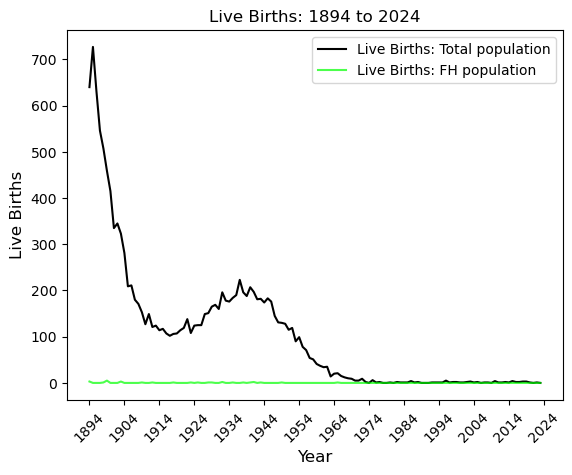

In [4]:
# lb_total = []
# lb_fh = []

# for i in range(0, len(GenerationsList)):
#     if GenerationsList[i][1] in range(end_year-130, end_year) and GenerationsList[i][-1] in range(end_year-130, end_year):
#             lb_total.append(GenerationsList[i][1])
#             if GenerationsList[i][-2] >0:
#                 lb_fh.append(GenerationsList[i][1])
                
# x1 = []
# x2 = []
# y = []

    
# for i in range(end_year-130, end_year):
#     x1.append(lb_total.count(i))
#     x2.append(lb_fh.count(i))
    
#     y.append(i)
    
    
# plt.title("Live Births: {} to {}".format(end_year-130, end_year))
# plt.xticks(np.arange(end_year-130, end_year+10, 10), rotation=45)
# plt.plot(y, x1, label="Live Births: Total population", color='black')
# plt.plot(y, x2, label="Live Births: FH population", color='lime', alpha=0.7)
# plt.xlabel("Year", fontsize=12)
# plt.ylabel("Live Births", fontsize=12)
# plt.legend()
# plt.show()

In [ ]:
                        true_negatives= simulation_result[27]
                        y_nonFH= simulation_result[28]
                        negative_relatives= simulation_result[29]

In [ ]:
true_negatives= simulation_result[27]

In [ ]:
true_negatives

In [ ]:
y_nonFH= simulation_result[28]
y_nonFH

In [ ]:
negative_relatives= simulation_result[29]

In [ ]:
negative_relatives